# **Ouroboros fMRI: Predicting human brain activity with machine learning models**

#### Version: 10th March 2021

==============================================================================================

Project developed by Maël Donoso, Ph.D. in Cognitive and Computational Neuroscience. Affiliations: Ouroboros Neurotechnologies (https://ouroboros-neurotechnologies.com/), Institut Lémanique du Cerveau (https://institut-cerveau.ch/), Policlinique Ostéopathique de Lausanne (https://policlinique-osteopathique-lausanne.ch/). 

The first version of this project (17th February 2021) was presented as a Capstone Project for the COS in Applied Data Science: Machine Learning of the EPFL Extension School (https://www.extensionschool.ch/).

==============================================================================================

This project is presented through six Notebooks:

***01: Data Analysis***

*02: Classification* (all classification models except neural networks)

*03: Neural Networks*

*04: Regression*

*05: Results*

*06: Complements*

==============================================================================================

### Notebook 01

# **Data Analysis**

## **1. Introduction**

### 1.1 Context

Functional Magnetic Resonance Imaging (fMRI) is one of the major tools used by neuroscientists for brain activity investigation. This neuroimaging technique measures the activity of the brain indirectly, by detecting the changes in the cerebral blood flow. In a typical neuroimaging setup, the raw data obtained from the fMRI scanner is normalized through several preprocessing steps. Then, one or several regression models are applied, in order to discover how much of the brain activity can be explained by the experimental conditions or other relevant variables. **The objective is to obtain statistical maps, i.e. a series of 3D images of the brain showing which cerebral regions are active under a defined condition.** These statistical maps are obtained on individual subjects, but can be averaged to perform group analyses. In these 3D images, each volume of the brain is referred to as a **voxel**, and a group of voxels is referred to as a **cluster**. 

As an illustration, let's consider a neuroimaging experiment using fMRI, where subjects inside the scanner are alternatively listening to music (auditory condition) and seeing pictures (visual condition). This experimental design should allow neuroscientists to obtain two statistical maps for each subject, one showing the brain activity during an auditive task, and the other showing the brain activity during a visual task. In terms of data, for each subject, we will end up with two 3D images of the brain, where each value represents the correlation strength between the experimental condition and the brain activity in a specific cerebral voxel. For example, if a voxel is situated in the visual cortex, we expect this voxel to show a high value in the 3D image associated to the visual condition, and if several voxels form a cluster situated in the auditory cortex, we expect the mean value of this cluster to be high in the 3D image associated to the auditory condition. 

### 1.2 Problem

In a typical neuroimaging study, the objective is to discover which brain regions are involved in a certain cognitive process, by aggregating the statistical maps obtained on individual subjects, and performing statistical analyses and/or other forms of investigation. In this project, we will address a different question. **Can we train machine learning models to recognize and predict brain activity?** This problem is actually two-fold, and can be seen both as a classification and a regression challenge. 

Continuing with the example from above, let's imagine that we train a series of classification models on a dataset of several visual and auditory statistical maps, obtained from several subjects. Then, we could test the accuracy of these models on a set of unseen and unlabelled statistical maps, obtained from new subjects. **Can we accurately classify these statistical maps?** In other words, if we run a series of classification models on these unseen and unlabelled 3D images, can we accurately guess in which experimental condition (visual or auditory) these images were obtained?

Since each map contains a large number of correlation values, we could also train a series of regression models on most of these values, and use one particular voxel or cluster as a target variable. Then, we could again test the accuracy of these models on a set of unseen statistical maps. **Can we accurately predict the value of a specific voxel or cluster, based on all the other values of the statistical map?** In other words, if we run a series of regression models on all voxels or clusters but one, can we get an accurate value for this voxel or cluster of interest?

The visual and auditory conditions are just an illustration. Typical neuroimaging experiments are usually more sophisticated, and often produce a variety of complex statistical maps, but the reasoning would be the same. **Overall, the objective of this project is to evaluate whether, for a given fMRI dataset, the information that machine learning models can obtain from a series of 3D statistical maps is sufficient to classify similar 3D statistical maps, and to predict the value of specific voxels or clusters in these maps.** 

### 1.3 Interest

The objective of a neuroimaging research using fMRI is to obtain relevant and generalizable knowledge about the brain activity. An extensive literature review is often performed by the authors of neuroimaging articles, in order to compare their results with those of other studies. Machine learning could provide a complementary approach. **For a given fMRI dataset, proving that machine learning models can be trained to classify and predict the brain activity could be a strong argument in favor of relevance and generalization.** If machine learning models can indeed learn a pattern from statistical maps, and accurately apply this pattern to new, unseen data, then we can be reasonably confident that these statistical maps contain some useful information. 

Furthermore, it seems that no standard tool has yet emerged for classification and prediction of fMRI activity. Machine learning tools for neuroimaging data have indeed been developed, for example the **Nilearn library in Python** (https://nilearn.github.io/), but at the time of writing this Notebook, none of the major neuroimaging software seem to include a complete machine learning module. Therefore, while many neuroscientists show a strong interest for the possibilities of machine learning, **classification and prediction of brain activity with machine learning models is currently not a part of the standard neuroimaging analysis pipeline**. For this reason, this project might present an interest for the neuroimaging community, particularly for those who are already familiar with NumPy, Scikit-learn and TensorFlow libraries. It might also present an interest for data scientists and machine learning developers who want to explore neuroimaging data. 

## **2. Dataset**

### 2.1 Source

In this project, we will use a dataset downloaded from NeuroVault (https://neurovault.org/), an open data repository for brain maps, where researchers can publicly store and share brain images obtained from several neuroimaging techniques, including fMRI. All brain maps are stored in the NIFTI format (.nii) and normalized using the MNI template. This format and this template are both standard tools in neuroimaging studies. Furthermore, all data is distributed under CC0 license (https://neurovault.org/FAQ), which means a public domain dedication and no copyright (https://creativecommons.org/publicdomain/zero/1.0/). 

Specifically, we will use the following dataset: **https://neurovault.org/collections/8740/**. This dataset comes from the following study, conducted at the University of Geneva: **Leitão, J., Meuleman, B., Van De Ville, D., & Vuilleumier, P. (2020). Computational imaging during video game playing shows dynamic synchronization of cortical and subcortical networks of emotions. PLOS Biology, 18(11), e3000900. doi:10.1371/journal.pbio.3000900**. This dataset has several interesting characteristics, notably: 1) The statistical maps are given for every individual subject, while other studies give only the maps at the group level. 2) There are several experimental conditions, and therefore several statistical maps per subject. 3) One experimental condition has 3 levels, which offers more classification possibilities than 2 levels, and seems therefore more interesting for a classification task. 4) At the time of writing this Notebook, it is a very recent study, published in November 2020. 5) The article presenting this study is publicly available, and can be found here: https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.3000900. 

**Before running this Notebook, the user should download the dataset by clicking on the blue button "Download" on this webpage: https://neurovault.org/collections/8740/.** The path of the dataset can be defined below. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib
import PIL.Image as Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Define the raw data path. 
data_path = '../ouroboros_fmri_raw_data/'

# Define the preprocessed data path. 
preprocessed_data_path = '../ouroboros_fmri_preprocessed_data/'

# Define the results path. If empty, the results will be saved in the current directory. 
results_path = ''

### 2.2 Files

The scientific detail of this study is outside the scope of this project, but in summary, the authors investigated the brain regions involved in emotion, by having 26 subjects play an arcade game inside an fMRI scanner. Several types of statistical maps were computed, but the most important ones are the **'appraisal'** maps. These maps give information about the apparaisal processes triggered by the game events, and are directly manipulated by the experimental design. 

The 'appraisal' statistical maps follow a **2 x 3 design structure**, crossing 2 levels of 'coping potential' (no-power, power) with 3 levels of 'goal conduciveness' (good, neutral, bad). Therefore, for each of the 26 subjects, we have **6 'appraisal' statistical maps**, corresponding to the 6 possible combinations of conditions: no-power/good, no-power/neutral, no-power/bad, power/good, power/neutral, power/bad. We are particularly interested in the 3 levels of 'goal conduciveness' (good, neutral, bad), because the 3 levels allow for more classification possibilities, but also because these conditions are associated with the valence or affective quality experienced by the subject, which is arguably the most important variable in emotion studies. Overall, we will work with **156 files: 26 subjects x 6 combinations of conditions per subject**. Each file contains a single statistical map in the NIFTI format. 

### 2.3 Data extraction

The data of each statistical map can be extracted as a 3D NumPy array with dimensions (91, 109, 91). These dimensions correspond to the three standard neurological views: sagittal (x), coronal (y), axial (z). Therefore, one array has 91 x 109 x 91 = 902629 values. According to the article, the data was acquired with a voxel resolution of 1 x 1 x 1 mm^3, but resampled to a spatial resolution of 2 x 2 x 2 mm^3 during the preprocessing. Therefore, for a particular subject, each voxel in our data represents the correlation strength between the experimental condition and the brain activity in a 2 x 2 x 2 mm^3 volume of brain. 

In order to extract the 3D NumPy arrays from the NIFTI files (.nii), or more exactly from the compressed NIFTI files (.nii.gz), we will use NiBabel, a library dedicated to neuroimaging: https://nipy.org/nibabel/nibabel_images.html. 

## **3. Data overview**

### 3.1 Files overview

In the following cells, we explore the **content of the data directory** and the different files of our dataset. 

In [3]:
# Retrieve and sort the names of the files from the data path. 
path, dirs, files = next(os.walk(data_path))
files_series = pd.Series(np.sort(files))

In [4]:
# Count how many files contain the substring 'appraisal'. 
files_appraisal = files_series[files_series.str.find('appraisal') != -1]
len(files_appraisal)

156

In [5]:
# Create a DataFrame. 
files_df = pd.DataFrame()

# Loop over the files. 
for file in range(0, len(files_appraisal)):
    # Retrieve the subject. 
    files_df.loc[file, 'Subject'] = files_appraisal.iloc[file][4:6]
    
    # Retrieve the good/neutral/bad condition. 
    if files_appraisal.iloc[file].find('good') != -1:
        files_df.loc[file, 'Valence'] = 'good'
    elif files_appraisal.iloc[file].find('neutral') != -1:
        files_df.loc[file, 'Valence'] = 'neutral'
    elif files_appraisal.iloc[file].find('bad') != -1:
        files_df.loc[file, 'Valence'] = 'bad'
        
    # Retrieve the no-power/power condition. 
    if files_appraisal.iloc[file].find('NoPower') != -1:
        files_df.loc[file, 'Power'] = 'no'
    else:
        files_df.loc[file, 'Power'] = 'yes'
        
# Display the first three subjects. 
files_df.head(18)

Subject  Valence Power
0       01      bad    no
1       01      bad   yes
2       01     good    no
3       01     good   yes
4       01  neutral    no
5       01  neutral   yes
6       02      bad    no
7       02      bad   yes
8       02     good    no
9       02     good   yes
10      02  neutral    no
11      02  neutral   yes
12      03      bad    no
13      03      bad   yes
14      03     good    no
15      03     good   yes
16      03  neutral    no
17      03  neutral   yes

In [6]:
# Display the number of subjects. 
files_df.Subject.nunique()

26

In [7]:
# Display all the subjects numbers. 
files_df.Subject.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26'], dtype=object)

In [8]:
# Display the number of files for the good/neutral/bad conditions. 
files_df.Valence.value_counts()

neutral    52
good       52
bad        52
Name: Valence, dtype: int64

In [9]:
# Display the number of files for the no-power/power conditions. 
files_df.Power.value_counts()

no     78
yes    78
Name: Power, dtype: int64

### 3.2 Image overview

In the following cells, we load one example image, verify its **format, size, memory usage and metadata**, and display a **section** of this image. 

In [10]:
# Install NiBabel as a pip package in the current Jupyter kernel. 
import sys
!{sys.executable} -m pip install nibabel

In [11]:
# Load a NIFTI image using the NiBabel library, and display its size. 
img = nib.load(data_path + 'sub-01_appraisal-goodNoPower_betas.nii.gz')
img.shape

(91, 109, 91)

In [12]:
# Extract the image data, and display its size. 
image_data = img.get_fdata()
image_data.shape

(91, 109, 91)

In [13]:
# Check that the image data is a NumPy array. 
type(image_data) == np.ndarray

True

In [14]:
# Check that the image data is in float64 format. 
image_data.dtype == np.dtype(np.float64)

True

In [15]:
# Display the total number of values. 
np.prod(image_data.shape)

902629

In [16]:
# Display the memory usage. 
print('Image size:', str(image_data.nbytes), 'bytes')

Image size: 7221032 bytes


In [17]:
# Display the metadata of the image. 
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'Contrast 2: good_noPower'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
srow_x         

The metadata contains mostly information specific to the **fMRI preprocessing**. The attribute 'dim' refers to the data dimensionality, starting with the number of dimensions (3), followed by the lengths of these dimensions (91, 109, 91), which are consistent with the size of the NumPy array. The attribute 'descrip' refers to the name of the statistical map, and is consistent with the file name. A complete definition of the NIFTI header can be found here: https://nifti.nimh.nih.gov/pub/dist/src/niftilib/nifti1.h. 

In [18]:
# Define a function to return the middle sections of an image data array. 
def middle_sections(image_data):
    return tuple((np.array(image_data.shape) / 2).astype(int))

In [19]:
# Find the middle sections coordinates of the image data array. 
middle_coord = middle_sections(image_data)
middle_coord

(45, 54, 45)

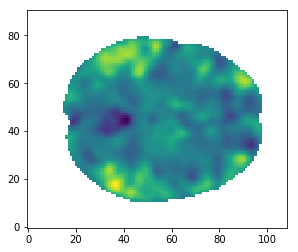

In [20]:
# Display a section of the image with an axial view, using the middle sections coordinates. 
plt.imshow(image_data[:, :, middle_coord[2]], origin = 'lower');

In this example image, displayed using the middle section of the axial view, we can see that different brain regions show different patterns of correlation strength with the experimental condition, here the combination of conditions 'no-power/good'. We must remember that this is only a 2D section of a larger 3D image. 

We can already notice that by construction, **a large part of these values will be NaN**. Indeed, each array represents a 3D space, inside which only the central voxels represent the brain of the subject. As it is often the case, the peripheral regions were excluded from the analysis using binary masks during the preprocessing step. Therefore, the NaN values correspond mostly to the peripheral regions of the array, spatially located outside the brain. 

### 3.3 Normalization

It is important to note that the arrays do not represent the brains of the different subjects in their true proportions, but rather a **normalized version using the MNI template**, which is a standardized brain model. In other words, the brain data of every subject is transformed into a standard space, in order to allow meaningful comparisons and statistics. The normalization process is not perfect, but as a corrective measure, the data is typically smoothed with a Gaussian kernel, as it is the case in this study. **One key implication of the normalization is that a (xi, yi, zi) voxel from one subject and one condition is comparable to a (xi, yi, zi) voxel of another subject or another condition.** In other words, thanks to the normalization, we can compare our 3D images elementwise between several subjects or conditions. 

This elementwise comparison has one limitation, nevertheless. Since the position of the subjects in the fMRI scanner vary, sometimes the brains can move slightly outside the fMRI scope. When that happens, subjects can have missing data, i.e. additional voxels with NaN values. 

### 3.4 Sagittal view

In this section and the next ones, in order to gain a better understanding of the data structure, we display **all the sections of our example image using the three neurological views**, and compare images **between several subjects and several conditions**. 

/Users/maeldonoso/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Users/maeldonoso/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/Users/maeldonoso/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/Users/maeldonoso/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/Users/maeldonoso/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/maeldonoso/opt/anaconda3/envs/exts-ml/lib/python3.6

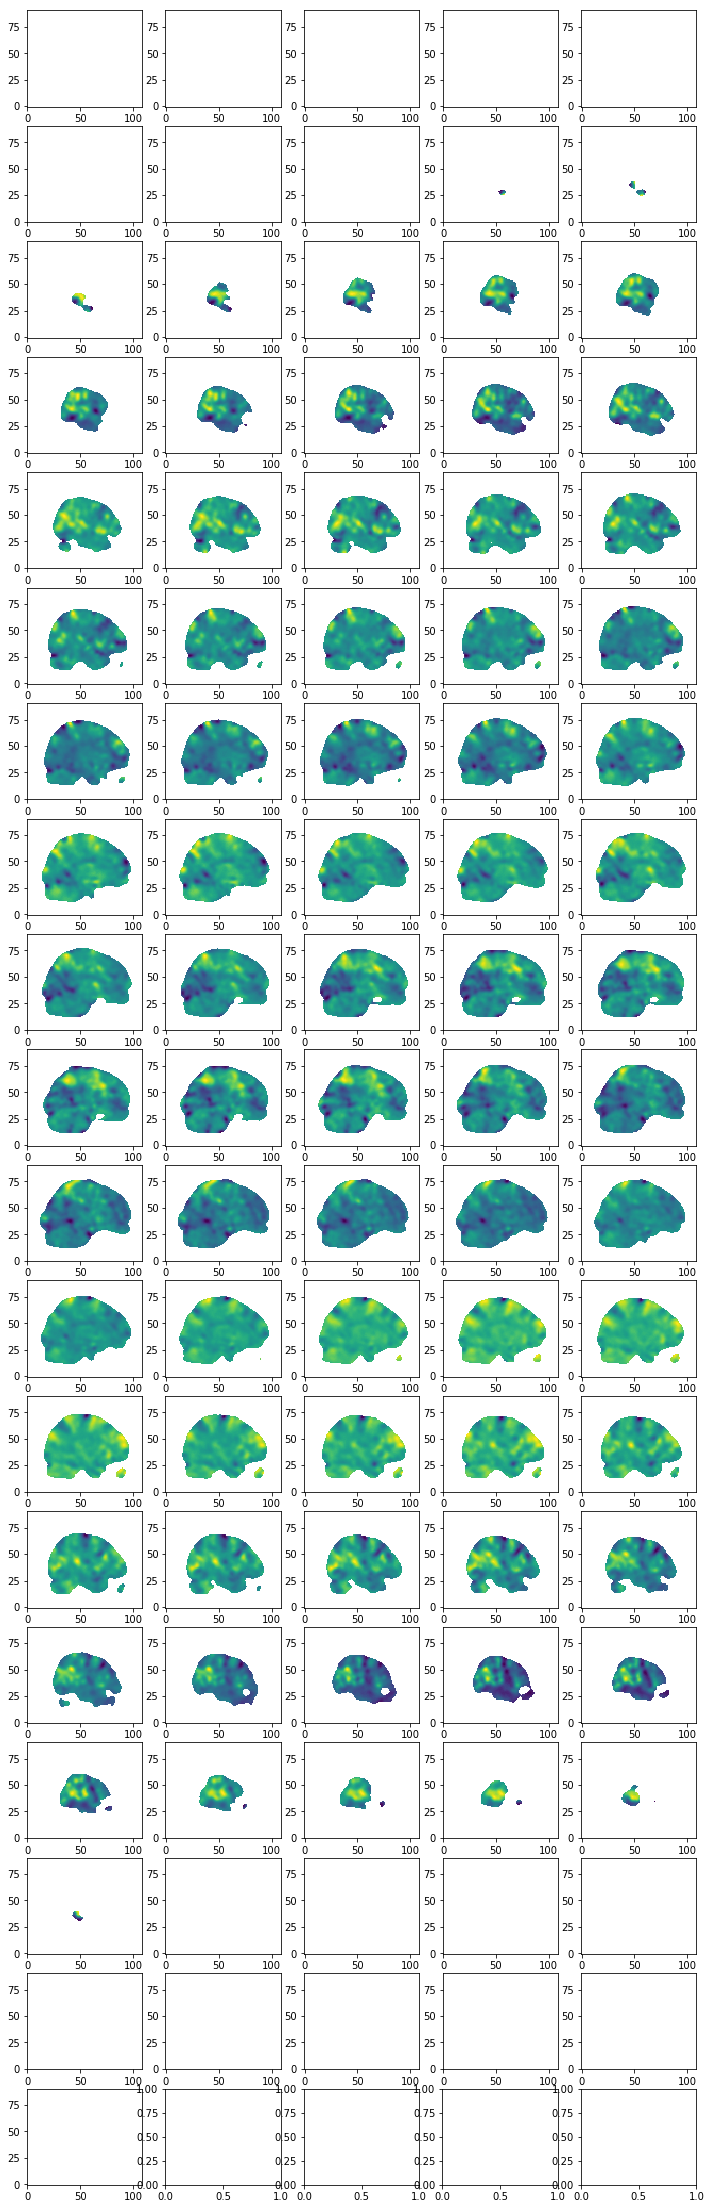

In [21]:
# Display all the sections of the image with an sagittal view. 
nb_columns = 5
fig, axes = plt.subplots(nrows = np.ceil(image_data.shape[0] / nb_columns).astype(int), ncols = nb_columns, figsize = (12, 40))

for slice_index in range(0, image_data.shape[0]):
    axes[(slice_index // nb_columns), (slice_index % nb_columns)].imshow(image_data[slice_index, :, :].T, origin = 'lower')

This representation is useful to get a general idea of the brain structure. We notice that all the peripheral regions have missing values, which is expected since the values from these regions are simply noise, and are often removed during the preprocessing of fMRI data. This can also be observed in the two following views. 

### 3.5 Coronal view

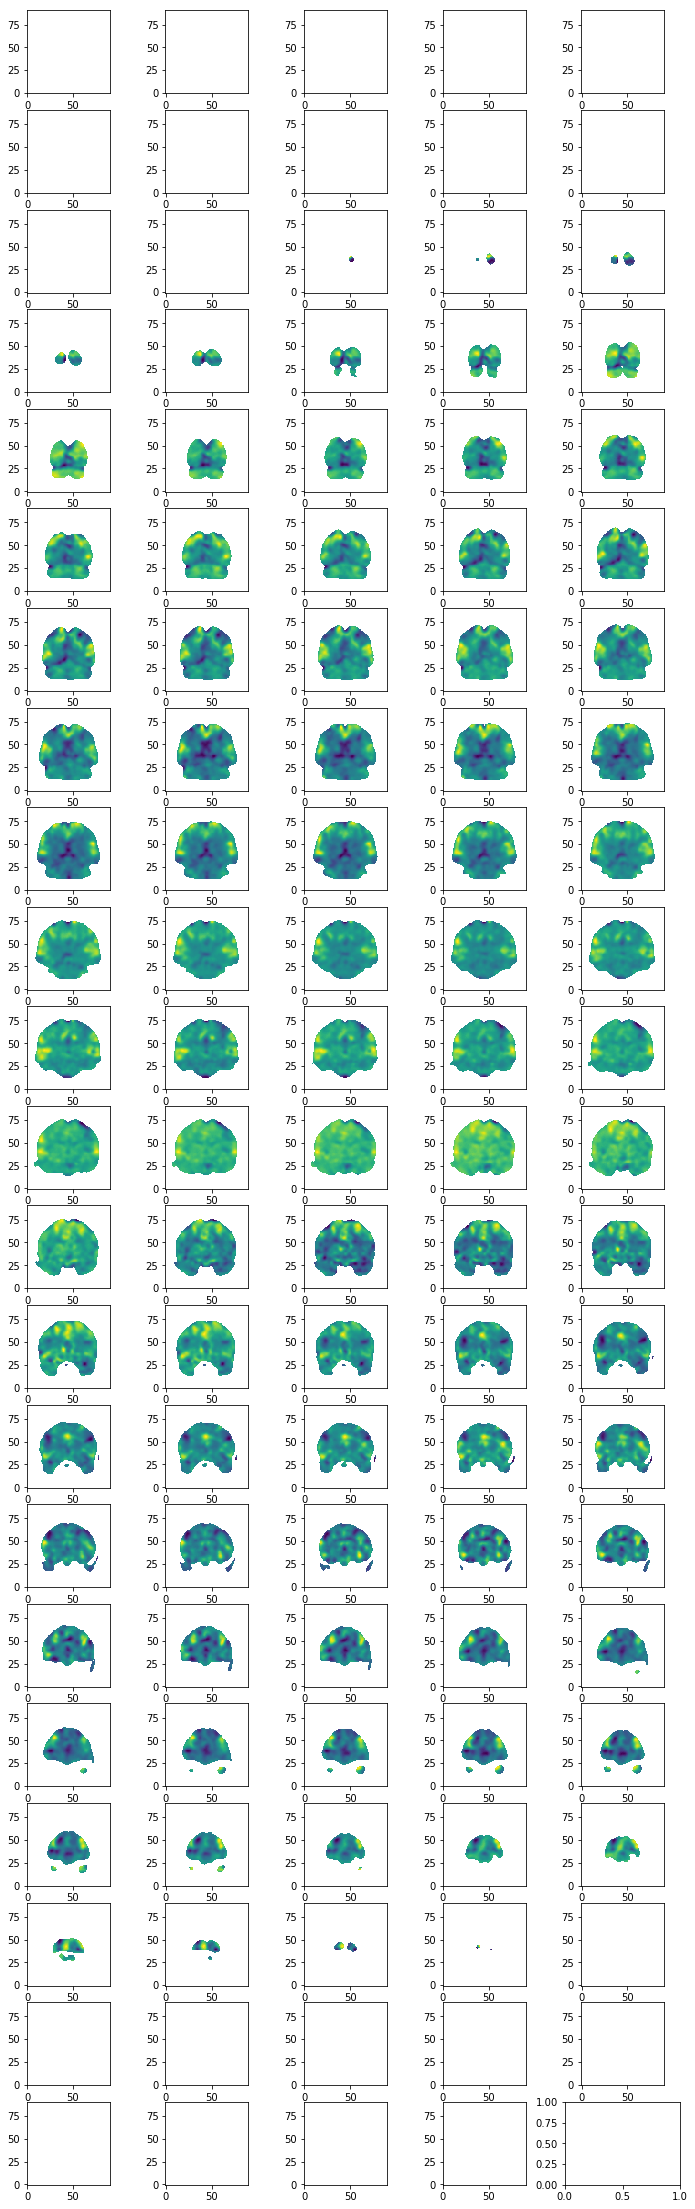

In [22]:
# Display all the sections of the image with an coronal view. 
nb_columns = 5
fig, axes = plt.subplots(nrows = np.ceil(image_data.shape[1] / nb_columns).astype(int), ncols = nb_columns, figsize = (12, 40))

for slice_index in range(0, image_data.shape[1]):
    axes[(slice_index // nb_columns), (slice_index % nb_columns)].imshow(image_data[:, slice_index, :].T, origin = 'lower')

### 3.6 Axial view

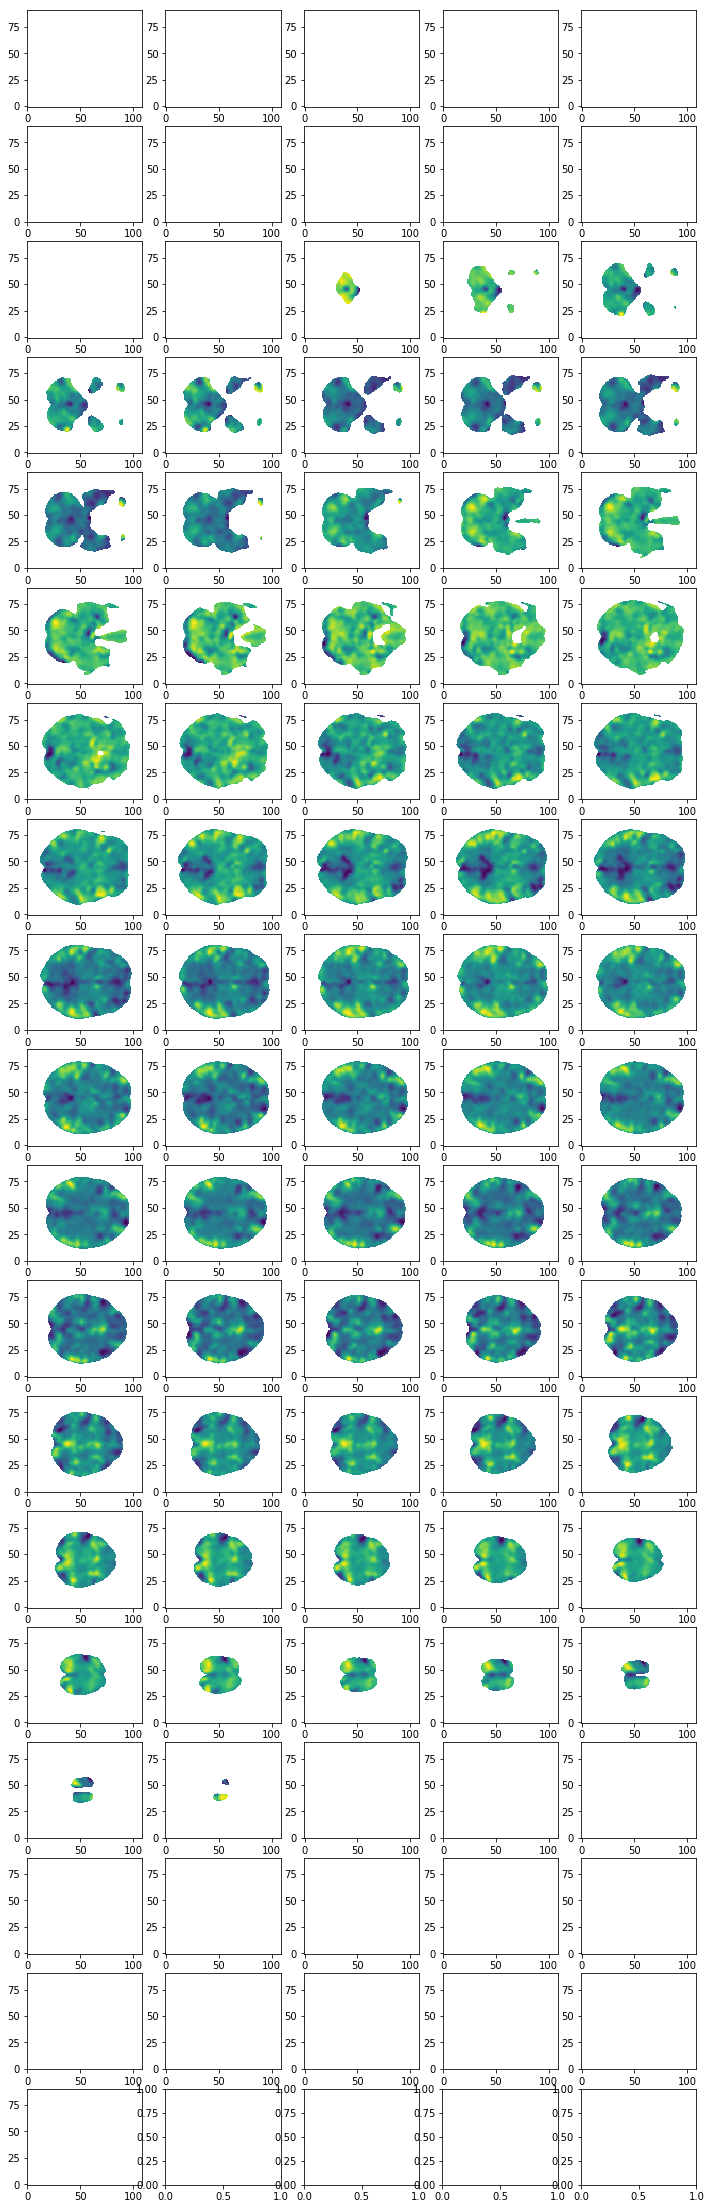

In [23]:
# Display all the sections of the image with an axial view. 
nb_columns = 5
fig, axes = plt.subplots(nrows = np.ceil(image_data.shape[2] / nb_columns).astype(int), ncols = nb_columns, figsize = (12, 40))

for slice_index in range(0, image_data.shape[2]):
    axes[(slice_index // nb_columns), (slice_index % nb_columns)].imshow(image_data[:, :, slice_index], origin = 'lower')

### 3.7 Inter-subjects variability

In [24]:
# Create a list of all subject numbers. 
all_subjects = []
for subject_number in range(1, 27):
    if subject_number < 10:
        all_subjects.append('0' + str(subject_number))
    else:
        all_subjects.append(str(subject_number))

print(all_subjects)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26']


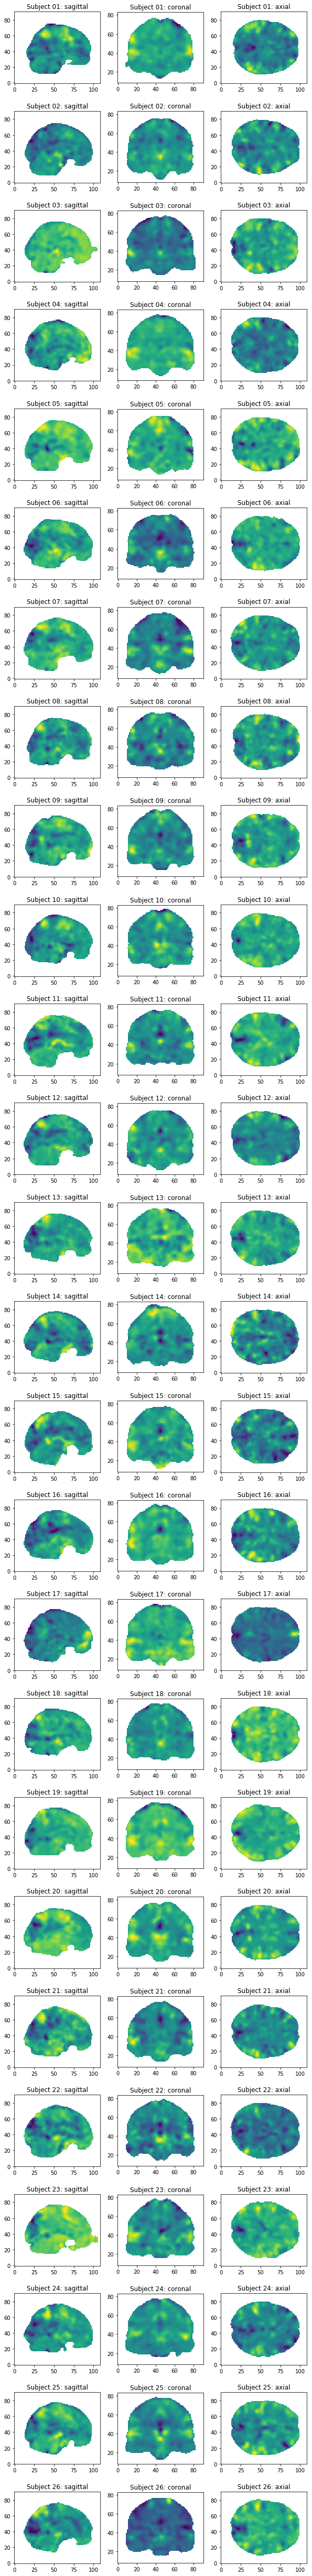

In [25]:
# Display middle sections of several images, corresponding to the same condition on all subjects. 
fig, axes = plt.subplots(nrows = 26, ncols = 3, figsize = (10, 90))

for subject in range(0, 26):
    # Get subject number. 
    subject_number = all_subjects[subject]
    
    # Load data from the 'no-power/good' condition. 
    img = nib.load(data_path + 'sub-' + subject_number + '_appraisal-goodNoPower_betas.nii.gz')
    image_data = img.get_fdata()
    
    # Display the data. 
    axes[subject, 0].imshow(image_data[middle_coord[0], :, :].T, origin = 'lower')
    axes[subject, 0].set_title('Subject ' + subject_number + ': sagittal')
    axes[subject, 1].imshow(image_data[:, middle_coord[1], :].T, origin = 'lower')
    axes[subject, 1].set_title('Subject ' + subject_number + ': coronal')
    axes[subject, 1].set_ylim(8, 83) # We adjust the size for a better visualization. 
    axes[subject, 2].imshow(image_data[:, :, middle_coord[2]], origin = 'lower')
    axes[subject, 2].set_title('Subject ' + subject_number + ': axial');

Here we notice that even within a single experimental condition, there are **important differences between subjects**. This is almost always the case in fMRI studies. When a neuroimaging article shows the brain regions involved in a certain cognitive process, most of the time, this region is obtained by averaging the statistical maps of a group of subjects. But at an individual level, there is actually a lot of variation in terms of brain response. 

### 3.8 Inter-conditions variability

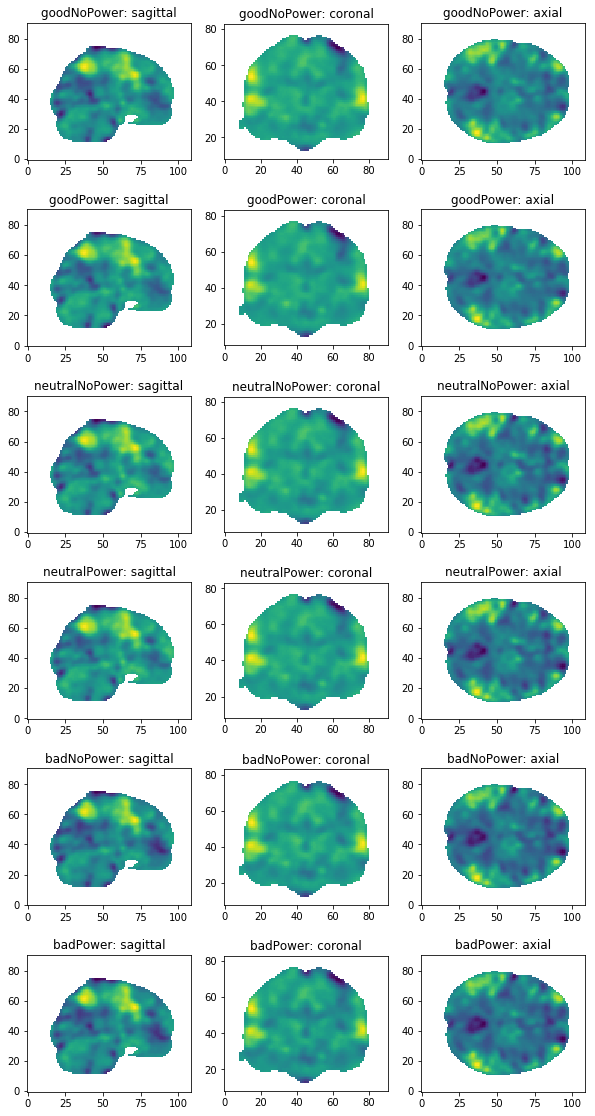

In [26]:
# Display middle sections of several images, corresponding to all conditions on the same subject. 
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (10, 20))
condition_index = 0

for condition in ['goodNoPower', 'goodPower', 'neutralNoPower', 'neutralPower', 'badNoPower', 'badPower']:
    # Load data from the first subject. 
    img = nib.load(data_path + 'sub-01_appraisal-' + condition + '_betas.nii.gz')
    image_data = img.get_fdata()
    
    # Display the data. 
    axes[condition_index, 0].imshow(image_data[middle_coord[0], :, :].T, origin = 'lower')
    axes[condition_index, 0].set_title(condition + ': sagittal')
    axes[condition_index, 1].imshow(image_data[:, middle_coord[1], :].T, origin = 'lower')
    axes[condition_index, 1].set_title(condition + ': coronal')
    axes[condition_index, 1].set_ylim(8, 83) # We adjust the size for a better visualization. 
    axes[condition_index, 2].imshow(image_data[:, :, middle_coord[2]], origin = 'lower')
    axes[condition_index, 2].set_title(condition + ': axial');
    
    # Increment the condition index. 
    condition_index += 1

Here we notice that even through different experimental conditions, **the statistical maps look very similar**. Again, this is quite logical. The difference between experimental conditions is relatively subtle, since these statistical maps represent variants of the same experimental paradigm. In contrast, the difference between subjects is much more important, as we saw in the previous cells.

## **4. Images rescaling**

### 4.1 Rationale for rescaling

**The high number of features (91 x 109 x 91 = 902629 values per array) is certainly one of the key challenges for the use of machine learning models.** One way to address this problem is to reduce the size of the arrays by averaging several contiguous voxels into higher-level clusters. In the function below, we use the NumPy function 'mean', therefore the clusters containing at least one NaN voxel will be entirely considered as NaN, which is the most conservative way to manage missing values during rescaling. 

In [27]:
# Define the rescaling function. 
def rescale_image_by_factor(image_data, factor):
    # Get the dimensions of the image data, and create a new, rescaled, image data array. 
    dimensions = (np.array(image_data.shape) / factor).astype('int')
    new_image_data = np.zeros((dimensions))
    
    # Loop over all voxels in the new image data. 
    for x_coord in range(0, dimensions[0]):
        for y_coord in range(0, dimensions[1]):
            for z_coord in range(0, dimensions[2]):
                new_image_data[x_coord, y_coord, z_coord] = np.mean(image_data[(factor * x_coord):(factor * x_coord + factor),
                                                                               (factor * y_coord):(factor * y_coord + factor),
                                                                               (factor * z_coord):(factor * z_coord + factor)])
                
    # Return the new image data and its dimensions. 
    return new_image_data, new_image_data.shape

### 4.2 Original image

In [28]:
# Load an image. 
img = nib.load(data_path + 'sub-01_appraisal-goodNoPower_betas.nii.gz')
image_data = img.get_fdata()
image_dimensions = image_data.shape
image_dimensions

(91, 109, 91)

In [29]:
middle_coord = middle_sections(image_data)
middle_coord

(45, 54, 45)

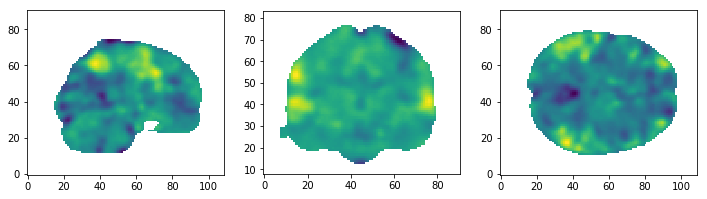

In [30]:
# Display the middle sections of the image through the three neurological views. 
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 6))
axes[0].imshow(image_data[middle_coord[0], :, :].T, origin = 'lower')
axes[1].imshow(image_data[:, middle_coord[1], :].T, origin = 'lower')
axes[1].set_ylim(8, 83) # We adjust the size for a better visualization. 
axes[2].imshow(image_data[:, :, middle_coord[2]], origin = 'lower');

### 4.3 Rescale voxel size by a factor 2

In [31]:
# Rescale the voxel size by a factor 2. 
image_data_r2, image_dimensions_r2 = rescale_image_by_factor(image_data, 2)
image_dimensions_r2

(45, 54, 45)

In [32]:
# Find the middle coordinates for the rescaled image. 
middle_coord_r2 = middle_sections(image_data_r2)
middle_coord_r2

(22, 27, 22)

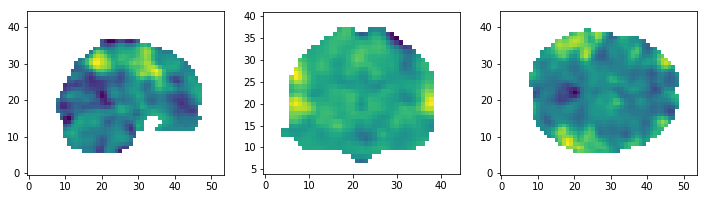

In [33]:
# Display the middle sections of the image through the three neurological views. 
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 6))
axes[0].imshow(image_data_r2[middle_coord_r2[0], :, :].T, origin = 'lower')
axes[1].imshow(image_data_r2[:, middle_coord_r2[1], :].T, origin = 'lower')
axes[1].set_ylim(4, 41) # We adjust the size for a better visualization. 
axes[2].imshow(image_data_r2[:, :, middle_coord_r2[2]], origin = 'lower');

In [34]:
# Display the memory usage. 
print('Original image:', str(image_data.nbytes), 'bytes')
print('Rescaled image:', str(image_data_r2.nbytes), 'bytes')
print('The original image is', str(np.round(image_data.nbytes / image_data_r2.nbytes, 2)), 'times heavier than the rescaled image.')

Original image: 7221032 bytes
Rescaled image: 874800 bytes
The original image is 8.25 times heavier than the rescaled image.


### 4.4 Rescale voxel size by a factor 3

In [35]:
# Rescale the voxel size by a factor 3. 
image_data_r3, image_dimensions_r3 = rescale_image_by_factor(image_data, 3)
image_dimensions_r3

(30, 36, 30)

In [36]:
# Find the middle coordinates for the rescaled image. 
middle_coord_r3 = middle_sections(image_data_r3)
middle_coord_r3

(15, 18, 15)

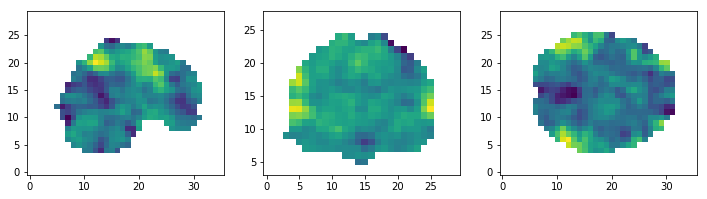

In [37]:
# Display the middle sections of the image through the three neurological views. 
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 6))
axes[0].imshow(image_data_r3[middle_coord_r3[0], :, :].T, origin = 'lower')
axes[1].imshow(image_data_r3[:, middle_coord_r3[1], :].T, origin = 'lower')
axes[1].set_ylim(3, 28) # We adjust the size for a better visualization. 
axes[2].imshow(image_data_r3[:, :, middle_coord_r3[2]], origin = 'lower');

In [38]:
# Display the memory usage. 
print('Original image:', str(image_data.nbytes), 'bytes')
print('Rescaled image:', str(image_data_r3.nbytes), 'bytes')
print('The original image is', str(np.round(image_data.nbytes / image_data_r3.nbytes, 2)), 'times heavier than the rescaled image.')

Original image: 7221032 bytes
Rescaled image: 259200 bytes
The original image is 27.86 times heavier than the rescaled image.


### 4.5 Rescale voxel size by a factor 4

In [39]:
# Rescale the voxel size by a factor 4. 
image_data_r4, image_dimensions_r4 = rescale_image_by_factor(image_data, 4)
image_dimensions_r4

(22, 27, 22)

In [40]:
# Find the middle coordinates for the rescaled image. 
middle_coord_r4 = middle_sections(image_data_r4)
middle_coord_r4

(11, 13, 11)

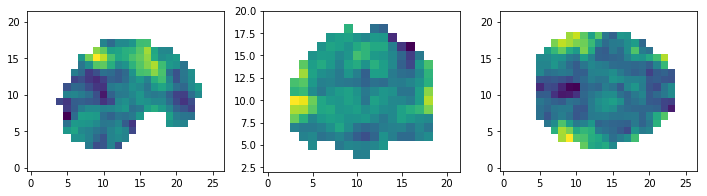

In [41]:
# Display the middle sections of the image through the three neurological views. 
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 6))
axes[0].imshow(image_data_r4[middle_coord_r4[0], :, :].T, origin = 'lower')
axes[1].imshow(image_data_r4[:, middle_coord_r4[1], :].T, origin = 'lower')
axes[1].set_ylim(2, 20) # We adjust the size for a better visualization. 
axes[2].imshow(image_data_r4[:, :, middle_coord_r4[2]], origin = 'lower');

In [42]:
# Display the memory usage. 
print('Original image:', str(image_data.nbytes), 'bytes')
print('Rescaled image:', str(image_data_r4.nbytes), 'bytes')
print('The original image is', str(np.round(image_data.nbytes / image_data_r4.nbytes, 2)), 'times heavier than the rescaled image.')

Original image: 7221032 bytes
Rescaled image: 104544 bytes
The original image is 69.07 times heavier than the rescaled image.


### 4.6 Comparison

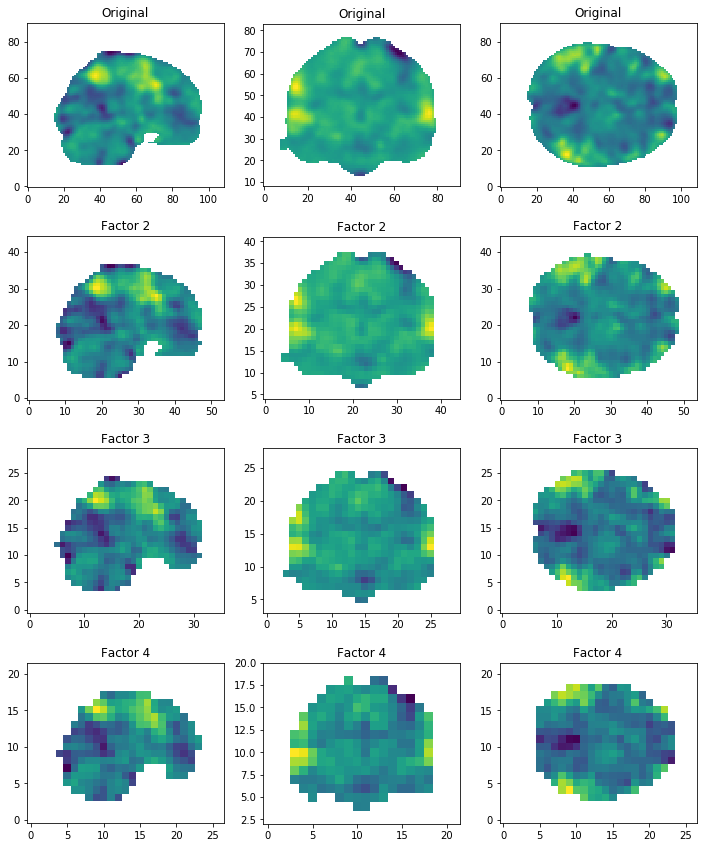

In [43]:
# Display the middle sections of the original and rescaled images through the three neurological views. 
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (12, 15))

# Original. 
axes[0, 0].imshow(image_data[middle_coord[0], :, :].T, origin = 'lower')
axes[0, 0].set_title('Original')
axes[0, 1].imshow(image_data[:, middle_coord[1], :].T, origin = 'lower')
axes[0, 1].set_ylim(8, 83) # We adjust the size for a better visualization. 
axes[0, 1].set_title('Original')
axes[0, 2].imshow(image_data[:, :, middle_coord[2]], origin = 'lower')
axes[0, 2].set_title('Original')

# Factor 2. 
axes[1, 0].imshow(image_data_r2[middle_coord_r2[0], :, :].T, origin = 'lower')
axes[1, 0].set_title('Factor 2')
axes[1, 1].imshow(image_data_r2[:, middle_coord_r2[1], :].T, origin = 'lower')
axes[1, 1].set_ylim(4, 41) # We adjust the size for a better visualization. 
axes[1, 1].set_title('Factor 2')
axes[1, 2].imshow(image_data_r2[:, :, middle_coord_r2[2]], origin = 'lower')
axes[1, 2].set_title('Factor 2')

# Factor 3. 
axes[2, 0].imshow(image_data_r3[middle_coord_r3[0], :, :].T, origin = 'lower')
axes[2, 0].set_title('Factor 3')
axes[2, 1].imshow(image_data_r3[:, middle_coord_r3[1], :].T, origin = 'lower')
axes[2, 1].set_ylim(3, 28) # We adjust the size for a better visualization. 
axes[2, 1].set_title('Factor 3')
axes[2, 2].imshow(image_data_r3[:, :, middle_coord_r3[2]], origin = 'lower')
axes[2, 2].set_title('Factor 3')

# Factor 4. 
axes[3, 0].imshow(image_data_r4[middle_coord_r4[0], :, :].T, origin = 'lower')
axes[3, 0].set_title('Factor 4')
axes[3, 1].imshow(image_data_r4[:, middle_coord_r4[1], :].T, origin = 'lower')
axes[3, 1].set_ylim(2, 20) # We adjust the size for a better visualization. 
axes[3, 1].set_title('Factor 4')
axes[3, 2].imshow(image_data_r4[:, :, middle_coord_r4[2]], origin = 'lower')
axes[3, 2].set_title('Factor 4');

Here we see that the rescaled statistical maps show, as expected, a rougher distribution of the same correlation patterns. Also as expected, the memory gain factor is about 8 (2 x 2 x 2) for the rescaling using the factor 2, about 27 (3 x 3 x 3) for the rescaling using the factor 3, and more than 64 (4 x 4 x 4) for the rescaling using the factor 4. 

### 4.7 Using rescaled images: a quick look forward into our machine learning strategy

Reducing the size of the images could help to avoid heavy computations in **classification models**. The rationale here is that, since the rescaling preserves roughly the same correlation patterns in the statistical maps, it could be possible to use the rescaled maps instead of the original ones, without losing all the relevant information. 

The same reasoning is true for **regression models**, but rescaling could be even more useful in this case. At the beginning of this project, we projected to train a series of regression models on most of the values from our images, and use one particular voxel or cluster as the target variable. Then, we planned to test the accuracy of these models on a set of unseen statistical maps, and discover if we can accurately predict the value of a specific voxel or cluster, based on all the other values of the statistical maps. The natural question is: **which voxel or cluster should we choose for these regression tasks**?

In neuroimaging studies, clusters of interest are typically defined with sophisticated methods. For example, a neuroimaging researcher could define a cluster as a group of adjacent voxels with a value over a certain statistical threshold, intersected with the volume corresponding to a particular brain structure, etc. In our case, we simply want to evaluate whether regression models can be trained to predict neuroimaging data, and do not have a special interest for a particular brain structure. Therefore, as a first step, we will simply choose the **voxel that shows the highest difference between two experimental conditions: the condition 'good' minus the condition 'bad'**. Indeed, conditions subtractions, referred to as 'contrasts', are very frequently used in neuroimaging studies in the process of selecting voxels or clusters of interest, and this **peak voxel** seems like a relevant target variable for our regression tasks. 

But then, in a second step, we will expand our analysis by running **multiple regression models covering the entire volume of the brain**, and the computations will quickly become too heavy with the original voxel size. A simple but relevant solution will be to perform this step using only the images rescaled by a factor 4, where each cluster corresponds to 64 original voxels. A size of 64 is perfectly in the range of typical clusters in neuroimaging studies, and functional connectivity analyses often use the values of similarly-sized clusters to infer connections between brain regions. Therefore, it makes sense to use rescaling and avoid heavy computations, while keeping an analysis pipeline consistent with the neuroimaging standards. 

Using the images rescaled by a factor 3, where each cluster corresponds to 27 original voxels, would also be a reasonable choice in theory, since a size of 27 is also in the range of typical clusters in neuroimaging studies. But then the computations become much heavier, therefore using the factor 4 seems to be the better choice in practice. 

## **5. Exploratory Data Analysis (EDA)**

### 5.1 General statistics

In the following cells, we compute and display general statistics by subject and condition: **mean, maximum, minimum and variance of the values**, as well as the **number of non-NaN values**. The mean and variance of the values seem of particular significance for neuroimaging data, since they represent, respectively: 1) the average correlation between the brain activity and the experimental condition, 2) the distribution of this correlation, i.e. whether the brain regions are homogenously active during this condition, or on the contrary show some activation patterns with some regions more correlated than others. The relation between the global mean and variance of the values is further explored with a scatter plot. 

In [44]:
# Compute general statistics by subject and condition. 
image_data_mean = pd.DataFrame()
image_data_max = pd.DataFrame()
image_data_min = pd.DataFrame()
image_data_var = pd.DataFrame()
image_data_nonnan = pd.DataFrame()

for subject in range(0, 26):
    for condition in ['goodNoPower', 'goodPower', 'neutralNoPower', 'neutralPower', 'badNoPower', 'badPower']:
        # Get subject number. 
        subject_number = all_subjects[subject]
        
        # Load data. 
        img = nib.load(data_path + 'sub-' + subject_number + '_appraisal-' + condition + '_betas.nii.gz')
        image_data = img.get_fdata()
        
        # Fill in the DataFrames. 
        image_data_mean.loc['Subject ' + subject_number, condition] = np.nanmean(image_data)
        image_data_max.loc['Subject ' + subject_number, condition] = np.nanmax(image_data)
        image_data_min.loc['Subject ' + subject_number, condition] = np.nanmin(image_data)
        image_data_var.loc['Subject ' + subject_number, condition] = np.nanvar(image_data)
        image_data_nonnan.loc['Subject ' + subject_number, condition] = np.sum(~np.isnan(image_data))
        
    # Compute the mean of the good, neutral and bad conditions. 
    image_data_mean.loc['Subject ' + subject_number, 'Good'] = np.mean(image_data_mean.iloc[subject, 0:1])
    image_data_mean.loc['Subject ' + subject_number, 'Neutral'] = np.mean(image_data_mean.iloc[subject, 2:3])
    image_data_mean.loc['Subject ' + subject_number, 'Bad'] = np.mean(image_data_mean.iloc[subject, 4:5])
    
    # Compute the max of the good, neutral and bad conditions. 
    image_data_max.loc['Subject ' + subject_number, 'Good'] = np.max(image_data_max.iloc[subject, 0:1])
    image_data_max.loc['Subject ' + subject_number, 'Neutral'] = np.max(image_data_max.iloc[subject, 2:3])
    image_data_max.loc['Subject ' + subject_number, 'Bad'] = np.max(image_data_max.iloc[subject, 4:5])
    
    # Compute the min of the good, neutral and bad conditions. 
    image_data_min.loc['Subject ' + subject_number, 'Good'] = np.min(image_data_min.iloc[subject, 0:1])
    image_data_min.loc['Subject ' + subject_number, 'Neutral'] = np.min(image_data_min.iloc[subject, 2:3])
    image_data_min.loc['Subject ' + subject_number, 'Bad'] = np.min(image_data_min.iloc[subject, 4:5])
    
    # Compute the mean variance of the good, neutral and bad conditions. 
    image_data_var.loc['Subject ' + subject_number, 'Good'] = np.mean(image_data_var.iloc[subject, 0:1])
    image_data_var.loc['Subject ' + subject_number, 'Neutral'] = np.mean(image_data_var.iloc[subject, 2:3])
    image_data_var.loc['Subject ' + subject_number, 'Bad'] = np.mean(image_data_var.iloc[subject, 4:5])
    
    # Compute the mean number of non-NaN values of the good, neutral and bad conditions. 
    image_data_nonnan.loc['Subject ' + subject_number, 'Good'] = np.mean(image_data_nonnan.iloc[subject, 0:1])
    image_data_nonnan.loc['Subject ' + subject_number, 'Neutral'] = np.mean(image_data_nonnan.iloc[subject, 2:3])
    image_data_nonnan.loc['Subject ' + subject_number, 'Bad'] = np.mean(image_data_nonnan.iloc[subject, 4:5])
    
    # Compute the average mean, max, min, var and non-NaN of all conditions. 
    image_data_mean.loc['Subject ' + subject_number, 'Average'] = np.mean(image_data_mean.iloc[subject, 0:5])
    image_data_max.loc['Subject ' + subject_number, 'Average'] = np.mean(image_data_max.iloc[subject, 0:5])
    image_data_min.loc['Subject ' + subject_number, 'Average'] = np.mean(image_data_min.iloc[subject, 0:5])
    image_data_var.loc['Subject ' + subject_number, 'Average'] = np.mean(image_data_var.iloc[subject, 0:5])
    image_data_nonnan.loc['Subject ' + subject_number, 'Average'] = np.mean(image_data_nonnan.iloc[subject, 0:5])
    
# Compute the average mean, max, min, var and non-NaN of all subjects. 
image_data_mean.loc['Average', :] = np.mean(image_data_mean)
image_data_max.loc['Average', :] = np.mean(image_data_max)
image_data_min.loc['Average', :] = np.mean(image_data_min)
image_data_var.loc['Average', :] = np.mean(image_data_var)
image_data_nonnan.loc['Average', :] = np.round(np.mean(image_data_nonnan), 0)

In [45]:
# Display mean values per subject and condition. 
image_data_mean

goodNoPower  goodPower  neutralNoPower  neutralPower  badNoPower  \
Subject 01     0.343405   0.414341        0.360175      0.342711    0.379755   
Subject 02     0.242824   0.203742        0.253943      0.280408    0.300559   
Subject 03     0.447752   0.500733        0.496363      0.455730    0.440899   
Subject 04     0.393569   0.439627        0.487246      0.484253    0.357259   
Subject 05     0.055624   0.060718        0.087088      0.087906    0.048994   
Subject 06    -0.048236  -0.091455       -0.031082      0.016542   -0.024403   
Subject 07    -0.011448   0.028268        0.094740      0.054251    0.091264   
Subject 08    -0.072776  -0.066786       -0.042011     -0.048876   -0.129253   
Subject 09     0.309715   0.217312        0.344816      0.362776    0.352773   
Subject 10     0.503223   0.509542        0.562483      0.497731    0.535206   
Subject 11    -0.251715  -0.240681       -0.217551     -0.196903   -0.283869   
Subject 12     0.126644   0.081305        0.294186      0.297486    0.222109   
Subject 13    -0.319971  -0.258660       -0.307554     -0.364760   -0.231019   
Subject 14    -0.035363  -0.014388        0.079525      0.193229    0.060472   
Subject 15    -0.255934  -0.245393       -0.130488     -0.104428   -0.117604   
Subject 16    -0.101475  -0.168858       -0.128439     -0.179094   -0.316355   
Subject 17     0.144138   0.073105        0.200669      0.115021    0.189033   
Subject 18     0.205603   0.225883        0.081181      0.096886    0.146617   
Subject 19     0.253342   0.194044        0.279298      0.262556    0.313293   
Subject 20     0.211014   0.192666        0.154111      0.171095    0.176964   
Subject 21    -0.031732   0.049677       -0.009825      0.038319    0.059848   
Subject 22     0.260841   0.286974        0.291776      0.354566    0.291655   
Subject 23     0.162835   0.083653        0.135160      0.175255    0.157810   
Subject 24     0.020846  -0.032356        0.037409      0.064837   -0.041320   
Subject 25     0.376857   0.320807        0.394170      0.409601    0.413039   
Subject 26    -0.065913  -0.055852       -0.066186     -0.051194    0.001803   
Average        0.110141   0.104153        0.142354      0.146766    0.130597   

            badPower      Good   Neutral       Bad   Average  
Subject 01  0.358355  0.343405  0.360175  0.379755  0.368077  
Subject 02  0.323438  0.242824  0.253943  0.300559  0.256295  
Subject 03  0.492895  0.447752  0.496363  0.440899  0.468295  
Subject 04  0.389887  0.393569  0.487246  0.357259  0.432391  
Subject 05  0.069125  0.055624  0.087088  0.048994  0.068066  
Subject 06 -0.004640 -0.048236 -0.031082 -0.024403 -0.035727  
Subject 07  0.124793 -0.011448  0.094740  0.091264  0.051415  
Subject 08 -0.072535 -0.072776 -0.042011 -0.129253 -0.071940  
Subject 09  0.346615  0.309715  0.344816  0.352773  0.317478  
Subject 10  0.544221  0.503223  0.562483  0.535206  0.521637  
Subject 11 -0.295351 -0.251715 -0.217551 -0.283869 -0.238144  
Subject 12  0.257771  0.126644  0.294186  0.222109  0.204346  
Subject 13 -0.346515 -0.319971 -0.307554 -0.231019 -0.296393  
Subject 14  0.146432 -0.035363  0.079525  0.060472  0.056695  
Subject 15 -0.193734 -0.255934 -0.130488 -0.117604 -0.170770  
Subject 16 -0.272243 -0.101475 -0.128439 -0.316355 -0.178844  
Subject 17  0.066600  0.144138  0.200669  0.189033  0.144393  
Subject 18  0.137577  0.205603  0.081181  0.146617  0.151234  
Subject 19  0.306158  0.253342  0.279298  0.313293  0.260507  
Subject 20  0.178025  0.211014  0.154111  0.176964  0.181170  
Subject 21  0.101934 -0.031732 -0.009825  0.059848  0.021257  
Subject 22  0.331635  0.260841  0.291776  0.291655  0.297163  
Subject 23  0.198186  0.162835  0.135160  0.157810  0.142943  
Subject 24 -0.009379  0.020846  0.037409 -0.041320  0.009883  
Subject 25  0.355556  0.376857  0.394170  0.413039  0.382895  
Subject 26 -0.011363 -0.065913 -0.066186  0.001803 -0.047469  
Average     0.135517  0.110141  0.142354  0.130597  0.126802

In [46]:
# Display max values per subject and condition. 
image_data_max

goodNoPower  goodPower  neutralNoPower  neutralPower  badNoPower  \
Subject 01    16.749340  18.458466       16.903366     16.601116   19.246229   
Subject 02    44.294258  31.113281       56.660450     57.556175   43.957729   
Subject 03    16.615229  16.090019       16.796310     16.024471   20.769688   
Subject 04    16.758415  18.383266       17.186592     15.970520   20.964785   
Subject 05    56.536541  46.340332       64.239281     61.082901   37.227139   
Subject 06    26.675339  15.407182       35.975998     38.549717   23.951477   
Subject 07    17.817181  17.189964       13.826867     15.384177   18.228792   
Subject 08    15.124793  15.369717       13.939922     14.000095   17.595903   
Subject 09    35.167660  20.480312       47.866825     41.655605   32.975410   
Subject 10    40.316509  41.217361       48.989563     45.492722   48.180466   
Subject 11    13.620522  13.466290       12.743790     13.041845   16.057770   
Subject 12    62.031857  54.076530       66.839828     71.343826   61.871479   
Subject 13    24.914448  19.023771       26.235369     28.662285   24.192043   
Subject 14    27.059473  27.238054       43.790485     43.214260   38.377087   
Subject 15    19.777248  20.354431       16.982304     16.866364   18.173298   
Subject 16    14.217836  16.562616       16.174498     14.648981   16.804985   
Subject 17    23.170048  19.406164       20.491714     29.045689   18.056522   
Subject 18    11.516660  12.509733       11.041921     10.844299   13.601808   
Subject 19    17.894533  18.798176       17.016245     17.048321   22.524750   
Subject 20    22.535484  24.926147       22.694416     22.139694   25.323532   
Subject 21    23.085506  23.458801       31.480215     21.797966   23.255478   
Subject 22    18.722492  13.083721       19.009031     18.332670   14.549681   
Subject 23    15.135913  13.466314       18.045715     18.766459   16.173059   
Subject 24    16.195316  16.724106       21.088804     20.138306   16.739773   
Subject 25    16.858686  18.491505       15.566763     14.738844   19.677299   
Subject 26    11.724959  12.379559       12.463505     13.237226   12.363959   
Average       24.019856  21.692916       27.078838     26.776328   24.647698   

             badPower       Good    Neutral        Bad    Average  
Subject 01  19.371975  16.749340  16.903366  19.246229  17.591703  
Subject 02  44.372047  44.294258  56.660450  43.957729  46.716379  
Subject 03  19.345831  16.615229  16.796310  20.769688  17.259143  
Subject 04  19.650225  16.758415  17.186592  20.964785  17.852716  
Subject 05  37.938156  56.536541  64.239281  37.227139  53.085239  
Subject 06  25.270929  26.675339  35.975998  23.951477  28.111942  
Subject 07  17.999075  17.817181  13.826867  18.228792  16.489396  
Subject 08  16.529709  15.124793  13.939922  17.595903  15.206086  
Subject 09  34.441761  35.167660  47.866825  32.975410  35.629163  
Subject 10  45.531849  40.316509  48.989563  48.180466  44.839324  
Subject 11  15.303618  13.620522  12.743790  16.057770  13.786043  
Subject 12  63.882229  62.031857  66.839828  61.871479  63.232704  
Subject 13  25.005871  24.914448  26.235369  24.192043  24.605583  
Subject 14  37.900730  27.059473  43.790485  38.377087  35.935872  
Subject 15  18.104233  19.777248  16.982304  18.173298  18.430729  
Subject 16  15.594110  14.217836  16.174498  16.804985  15.681783  
Subject 17  19.091467  23.170048  20.491714  18.056522  22.034027  
Subject 18  12.648046  11.516660  11.041921  13.601808  11.902884  
Subject 19  22.147533  17.894533  17.016245  22.524750  18.656405  
Subject 20  25.229280  22.535484  22.694416  25.323532  23.523855  
Subject 21  22.445419  23.085506  31.480215  23.255478  24.615593  
Subject 22  15.971528  18.722492  19.009031  14.549681  16.739519  
Subject 23  15.659802  15.135913  18.045715  16.173059  16.317492  
Subject 24  17.025507  16.195316  21.088804  16.739773  18.177261  
Subject 25  18.154068  16.858686  15.566763  19.677299  17.066619  
Sub

In [47]:
# Display min values per subject and condition. 
image_data_min

goodNoPower  goodPower  neutralNoPower  neutralPower  badNoPower  \
Subject 01   -22.855421 -23.371983      -22.896343    -21.997223  -21.245064   
Subject 02   -19.400698 -21.656664      -19.385935    -19.287285  -18.921986   
Subject 03   -26.025749 -29.354343      -27.952593    -25.712990  -36.881416   
Subject 04   -18.828726 -18.899391      -19.060692    -18.401047  -19.322754   
Subject 05   -26.104469 -25.612951      -25.217802    -25.334324  -23.073601   
Subject 06   -18.759666 -19.184240      -18.668930    -18.315657  -18.431841   
Subject 07   -18.350210 -18.183704      -17.398653    -17.203064  -19.800812   
Subject 08   -21.246452 -22.969305      -22.842731    -20.875639  -30.118689   
Subject 09   -21.928349 -19.125658      -19.004791    -20.847282  -23.866949   
Subject 10   -21.178102 -20.273941      -20.907742    -20.101633  -21.012804   
Subject 11   -23.002197 -23.638336      -24.677549    -24.478931  -23.177917   
Subject 12   -24.235601 -24.413952      -23.807854    -24.600931  -25.161530   
Subject 13   -19.961864 -20.336073      -19.550543    -19.850624  -19.281776   
Subject 14   -17.362650 -16.677574      -21.260881    -21.305271  -20.474022   
Subject 15   -20.135078 -18.850506      -20.376404    -20.047661  -19.909977   
Subject 16   -17.834034 -16.197439      -18.638697    -17.972944  -16.107149   
Subject 17   -21.812449 -21.689877      -20.120289    -21.784466  -18.841911   
Subject 18   -16.565405 -16.548351      -16.624195    -16.612457  -16.548685   
Subject 19   -23.423283 -23.154995      -21.026180    -23.074818  -22.936907   
Subject 20   -26.149233 -27.189377      -27.288624    -26.475857  -27.458517   
Subject 21   -14.253807 -18.622692      -14.309080    -13.767943  -15.391168   
Subject 22   -13.803019 -14.874477      -13.636982    -13.322163  -15.049210   
Subject 23   -17.795517 -18.077017      -16.526556    -18.131355  -17.245155   
Subject 24   -14.102415 -14.219019      -12.177448    -11.966513  -15.921398   
Subject 25   -18.986685 -18.097542      -18.697786    -18.255871  -19.207832   
Subject 26   -14.857065 -15.435103      -13.726957    -13.679768  -13.370237   
Average      -19.959929 -20.255943      -19.837778    -19.746297  -20.721512   

             badPower       Good    Neutral        Bad    Average  
Subject 01 -20.814276 -22.855421 -22.896343 -21.245064 -22.473207  
Subject 02 -18.480164 -19.400698 -19.385935 -18.921986 -19.730513  
Subject 03 -34.822014 -26.025749 -27.952593 -36.881416 -29.185418  
Subject 04 -18.427423 -18.828726 -19.060692 -19.322754 -18.902522  
Subject 05 -24.388014 -26.104469 -25.217802 -23.073601 -25.068629  
Subject 06 -18.860344 -18.759666 -18.668930 -18.431841 -18.672067  
Subject 07 -18.674637 -18.350210 -17.398653 -19.800812 -18.187289  
Subject 08 -28.276237 -21.246452 -22.842731 -30.118689 -23.610563  
Subject 09 -21.909193 -21.928349 -19.004791 -23.866949 -20.954606  
Subject 10 -21.495556 -21.178102 -20.907742 -21.012804 -20.694844  
Subject 11 -22.614386 -23.002197 -24.677549 -23.177917 -23.794986  
Subject 12 -25.117990 -24.235601 -23.807854 -25.161530 -24.443974  
Subject 13 -19.028582 -19.961864 -19.550543 -19.281776 -19.796176  
Subject 14 -19.942562 -17.362650 -21.260881 -20.474022 -19.416080  
Subject 15 -19.240837 -20.135078 -20.376404 -19.909977 -19.863925  
Subject 16 -16.782434 -17.834034 -18.638697 -16.107149 -17.350053  
Subject 17 -20.944738 -21.812449 -20.120289 -18.841911 -20.849798  
Subject 18 -16.552135 -16.565405 -16.624195 -16.548685 -16.579819  
Subject 19 -23.811287 -23.423283 -21.026180 -22.936907 -22.723236  
Subject 20 -27.149166 -26.149233 -27.288624 -27.458517 -26.912321  
Subject 21 -14.125896 -14.253807 -14.309080 -15.391168 -15.268938  
Subject 22 -13.747604 -13.803019 -13.636982 -15.049210 -14.137170  
Subject 23 -17.298832 -17.795517 -16.526556 -17.245155 -17.555120  
Subject 24 -15.477945 -14.102415 -12.177448 -15.921398 -13.677359  
Subject 25 -17.961102 -18.986685 -18.697786 -19.207832 -18.649143  
Sub

In [48]:
# Display variance per subject and condition. 
image_data_var

goodNoPower  goodPower  neutralNoPower  neutralPower  badNoPower  \
Subject 01    12.837974  14.452508       12.985161     12.040689   16.054040   
Subject 02    14.371923  13.901979       15.084774     14.427252   17.934228   
Subject 03     6.547711   7.374355        7.492943      6.066019    8.075633   
Subject 04     8.679481   9.164714        8.980387      8.787868    7.597603   
Subject 05    12.254763  12.261099       11.420191     10.902534   12.570126   
Subject 06     8.933143   9.410679        9.506934      8.982527   12.200275   
Subject 07     8.471766   8.050181        6.589469      6.901232    9.671631   
Subject 08     6.113139   6.710867        5.743408      5.666910    8.403515   
Subject 09     8.698544   8.595790        8.440698      7.772240    9.048280   
Subject 10     7.979560   7.908897        8.068956      7.235824    9.178547   
Subject 11     8.232939   7.970583        7.464064      7.256511    9.747636   
Subject 12    16.946768  18.246413       15.739318     16.339661   18.072621   
Subject 13     6.400888   7.422990        6.087849      6.007000    7.979099   
Subject 14    10.627696  10.309671        9.706597      9.226290   11.367795   
Subject 15     8.829857   9.358144        6.290168      6.375462    8.003119   
Subject 16    11.871119  12.771889       10.002418      9.984058   12.578873   
Subject 17     8.236291   7.613528        8.068536      7.305209    7.861423   
Subject 18     4.705189   4.653930        3.861933      3.798420    5.171805   
Subject 19     9.695262  10.228332        9.103017      9.202110   11.756828   
Subject 20    12.819651  14.241129       11.108780     10.297742   14.996711   
Subject 21     8.455883   9.248588        6.870231      6.795278   11.037704   
Subject 22     4.838910   4.914318        4.383461      4.059172    5.633794   
Subject 23     4.781575   5.088978        3.972290      4.202312    5.598585   
Subject 24     6.843272   6.662961        5.133663      4.682592    7.740606   
Subject 25     7.211362   7.619314        6.616113      6.325216    9.545856   
Subject 26     3.940964   4.328058        3.398791      3.305878    4.679564   
Average        8.820217   9.173457        8.158467      7.844077   10.096381   

             badPower       Good    Neutral        Bad    Average  
Subject 01  15.792919  12.837974  12.985161  16.054040  13.674074  
Subject 02  17.750089  14.371923  15.084774  17.934228  15.144031  
Subject 03   7.462225   6.547711   7.492943   8.075633   7.111332  
Subject 04   7.040831   8.679481   8.980387   7.597603   8.642011  
Subject 05  11.621866  12.254763  11.420191  12.570126  11.881743  
Subject 06  12.687468   8.933143   9.506934  12.200275   9.806712  
Subject 07   9.606230   8.471766   6.589469   9.671631   7.936856  
Subject 08   8.238874   6.113139   5.743408   8.403515   6.527568  
Subject 09   8.551434   8.698544   8.440698   9.048280   8.511111  
Subject 10   9.201336   7.979560   8.068956   9.178547   8.074357  
Subject 11   9.165308   8.232939   7.464064   9.747636   8.134346  
Subject 12  17.515612  16.946768  15.739318  18.072621  17.068956  
Subject 13   7.549455   6.400888   6.087849   7.979099   6.779565  
Subject 14  10.583010  10.627696   9.706597  11.367795  10.247610  
Subject 15   7.864666   8.829857   6.290168   8.003119   7.771350  
Subject 16  11.940536  11.871119  10.002418  12.578873  11.441672  
Subject 17   7.586680   8.236291   8.068536   7.861423   7.816997  
Subject 18   4.416797   4.705189   3.861933   5.171805   4.438255  
Subject 19  11.512887   9.695262   9.103017  11.756828   9.997110  
Subject 20  14.474777  12.819651  11.108780  14.996711  12.692803  
Subject 21  10.302583   8.455883   6.870231  11.037704   8.481537  
Subject 22   4.354363   4.838910   4.383461   5.633794   4.765931  
Subject 23   5.381061   4.781575   3.972290   5.598585   4.728748  
Subject 24   7.610854   6.843272   5.133663   7.740606   6.212619  
Subject 25   8.516021   7.211362   6.616113   9.545856   7.463572  
Sub

In [49]:
# Display number of non-NaN values per subject and condition. 
image_data_nonnan

goodNoPower  goodPower  neutralNoPower  neutralPower  badNoPower  \
Subject 01     205786.0   205786.0        205786.0      205786.0    205786.0   
Subject 02     217761.0   217761.0        217761.0      217761.0    217761.0   
Subject 03     222597.0   222597.0        222597.0      222597.0    222597.0   
Subject 04     210715.0   210715.0        210715.0      210715.0    210715.0   
Subject 05     209875.0   209875.0        209875.0      209875.0    209875.0   
Subject 06     211064.0   211064.0        211064.0      211064.0    211064.0   
Subject 07     224958.0   224958.0        224958.0      224958.0    224958.0   
Subject 08     207649.0   207649.0        207649.0      207649.0    207649.0   
Subject 09     214022.0   214022.0        214022.0      214022.0    214022.0   
Subject 10     206924.0   206924.0        206924.0      206924.0    206924.0   
Subject 11     216094.0   216094.0        216094.0      216094.0    216094.0   
Subject 12     218496.0   218496.0        218496.0      218496.0    218496.0   
Subject 13     215074.0   215074.0        215074.0      215074.0    215074.0   
Subject 14     215862.0   215862.0        215862.0      215862.0    215862.0   
Subject 15     218371.0   218371.0        218371.0      218371.0    218371.0   
Subject 16     210331.0   210331.0        210331.0      210331.0    210331.0   
Subject 17     225365.0   225365.0        225365.0      225365.0    225365.0   
Subject 18     208078.0   208078.0        208078.0      208078.0    208078.0   
Subject 19     214770.0   214770.0        214770.0      214770.0    214770.0   
Subject 20     215757.0   215757.0        215757.0      215757.0    215757.0   
Subject 21     203035.0   203035.0        203035.0      203035.0    203035.0   
Subject 22     228038.0   228038.0        228038.0      228038.0    228038.0   
Subject 23     217329.0   217329.0        217329.0      217329.0    217329.0   
Subject 24     213760.0   213760.0        213760.0      213760.0    213760.0   
Subject 25     223633.0   223633.0        223633.0      223633.0    223633.0   
Subject 26     211829.0   211829.0        211829.0      211829.0    211829.0   
Average        214891.0   214891.0        214891.0      214891.0    214891.0   

            badPower      Good   Neutral       Bad   Average  
Subject 01  205786.0  205786.0  205786.0  205786.0  205786.0  
Subject 02  217761.0  217761.0  217761.0  217761.0  217761.0  
Subject 03  222597.0  222597.0  222597.0  222597.0  222597.0  
Subject 04  210715.0  210715.0  210715.0  210715.0  210715.0  
Subject 05  209875.0  209875.0  209875.0  209875.0  209875.0  
Subject 06  211064.0  211064.0  211064.0  211064.0  211064.0  
Subject 07  224958.0  224958.0  224958.0  224958.0  224958.0  
Subject 08  207649.0  207649.0  207649.0  207649.0  207649.0  
Subject 09  214022.0  214022.0  214022.0  214022.0  214022.0  
Subject 10  206924.0  206924.0  206924.0  206924.0  206924.0  
Subject 11  216094.0  216094.0  216094.0  216094.0  216094.0  
Subject 12  218496.0  218496.0  218496.0  218496.0  218496.0  
Subject 13  215074.0  215074.0  215074.0  215074.0  215074.0  
Subject 14  215862.0  215862.0  215862.0  215862.0  215862.0  
Subject 15  218371.0  218371.0  218371.0  218371.0  218371.0  
Subject 16  210331.0  210331.0  210331.0  210331.0  210331.0  
Subject 17  225365.0  225365.0  225365.0  225365.0  225365.0  
Subject 18  208078.0  208078.0  208078.0  208078.0  208078.0  
Subject 19  214770.0  214770.0  214770.0  214770.0  214770.0  
Subject 20  215757.0  215757.0  215757.0  215757.0  215757.0  
Subject 21  203035.0  203035.0  203035.0  203035.0  203035.0  
Subject 22  228038.0  228038.0  228038.0  228038.0  228038.0  
Subject 23  217329.0  217329.0  217329.0  217329.0  217329.0  
Subject 24  213760.0  213760.0  213760.0  213760.0  213760.0  
Subject 25  223633.0  223633.0  223633.0  223633.0  223633.0  
Subject 26  211829.0  211829.0  211829.0  211829.0  211829.0  
Average     214891.0  214891.0  214891.0  214891.0  214891.0

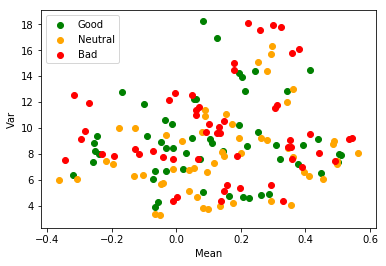

In [50]:
# Concatenate mean and var from the previous DataFrames.  
good_mean = np.concatenate((image_data_mean['goodNoPower'].values, image_data_mean['goodPower'].values))
neutral_mean = np.concatenate((image_data_mean['neutralNoPower'].values, image_data_mean['neutralPower'].values))
bad_mean = np.concatenate((image_data_mean['badNoPower'].values, image_data_mean['badPower'].values))

good_var = np.concatenate((image_data_var['goodNoPower'].values, image_data_var['goodPower'].values))
neutral_var = np.concatenate((image_data_var['neutralNoPower'].values, image_data_var['neutralPower'].values))
bad_var = np.concatenate((image_data_var['badNoPower'].values, image_data_var['badPower'].values))

# Display a scatter plot. 
plt.scatter(good_mean, good_var, label = 'Good', color = 'green')
plt.scatter(neutral_mean, neutral_var, label = 'Neutral', color = 'orange')
plt.scatter(bad_mean, bad_var, label = 'Bad', color = 'red')

# Add labels and legend. 
plt.legend()
plt.xlabel('Mean')
plt.ylabel('Var');

Between subjects, the DataFrames show a lot of variability, which was already suggested by the visualization of the brain maps. Between conditions, the DataFrames show some differences, but it is difficult to find a general pattern. The scatter plot shows that the good, neutral and bad conditions are mostly intertwined, with no apparent clusters. Overall, at this level of analysis, there seem to be **no clear relationship between the features and the target**. 

### 5.2 Distribution of the values

In the following cells, we explore the distribution of the non-NaN values of our brain maps, **differentiating them by subject or by condition**. We display the results as a series of histograms and boxplots. 

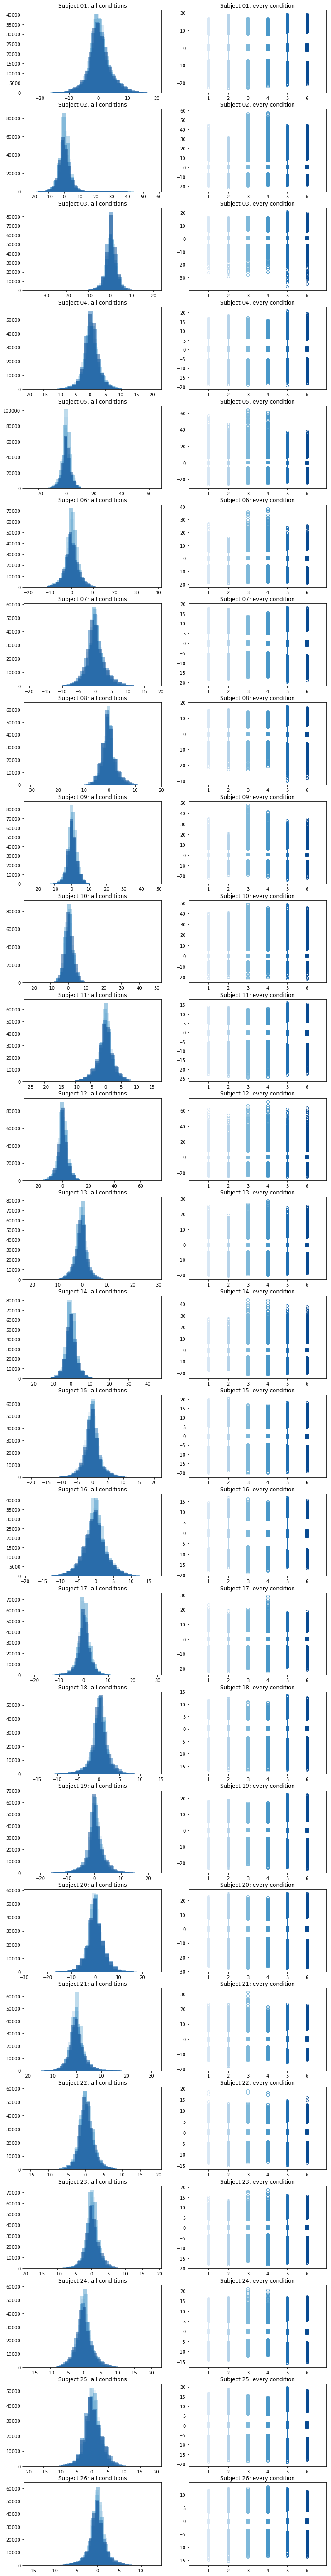

In [51]:
# Display histograms and boxplots, differentiating by subject. 
fig, axes = plt.subplots(nrows = 26, ncols = 2, figsize = (12, 104))

for subject in range(0, 26):
    condition_index = 0
    
    # Get subject number. 
    subject_number = all_subjects[subject]
    
    for condition in ['goodNoPower', 'goodPower', 'neutralNoPower', 'neutralPower', 'badNoPower', 'badPower']:
        # Increment the condition index. 
        condition_index += 1
        
        # Load data. 
        img = nib.load(data_path + 'sub-' + subject_number + '_appraisal-' + condition + '_betas.nii.gz')
        image_data = img.get_fdata()
        
        # Flatten the image and remove the NaN values. 
        flatten_image = image_data.flatten()
        flatten_image = flatten_image[~np.isnan(flatten_image)]
        
        # Define colormap and select a color for the condition. 
        cm = plt.cm.get_cmap('Blues')
        c = cm(0.15 * condition_index)
        
        # Display the data and set titles. 
        axes[subject, 0].hist(flatten_image, bins = 30, alpha = 0.5, color = c)
        axes[subject, 0].set_title('Subject ' + subject_number + ': all conditions')
        
        axes[subject, 1].boxplot(flatten_image, positions = [condition_index], patch_artist = True,
            boxprops = dict(facecolor = c, color = c),
            capprops = dict(color = c),
            whiskerprops = dict(color = c),
            flierprops = dict(color = c, markeredgecolor = c),
            medianprops = dict(color = c),
            )
        axes[subject, 1].set_xlim(0, 7)
        axes[subject, 1].set_xticks([1, 2, 3, 4, 5, 6])
        axes[subject, 1].set_xticklabels(['1', '2', '3', '4', '5', '6'])
        axes[subject, 1].set_title('Subject ' + subject_number + ': every condition')

Overall, we observe a **certain variability between subjects**, with a skewness in some of the histograms. On the contrary, for a given subject, the distributions of the values in the different conditions seem relatively similar, as we can see in the boxplots. 

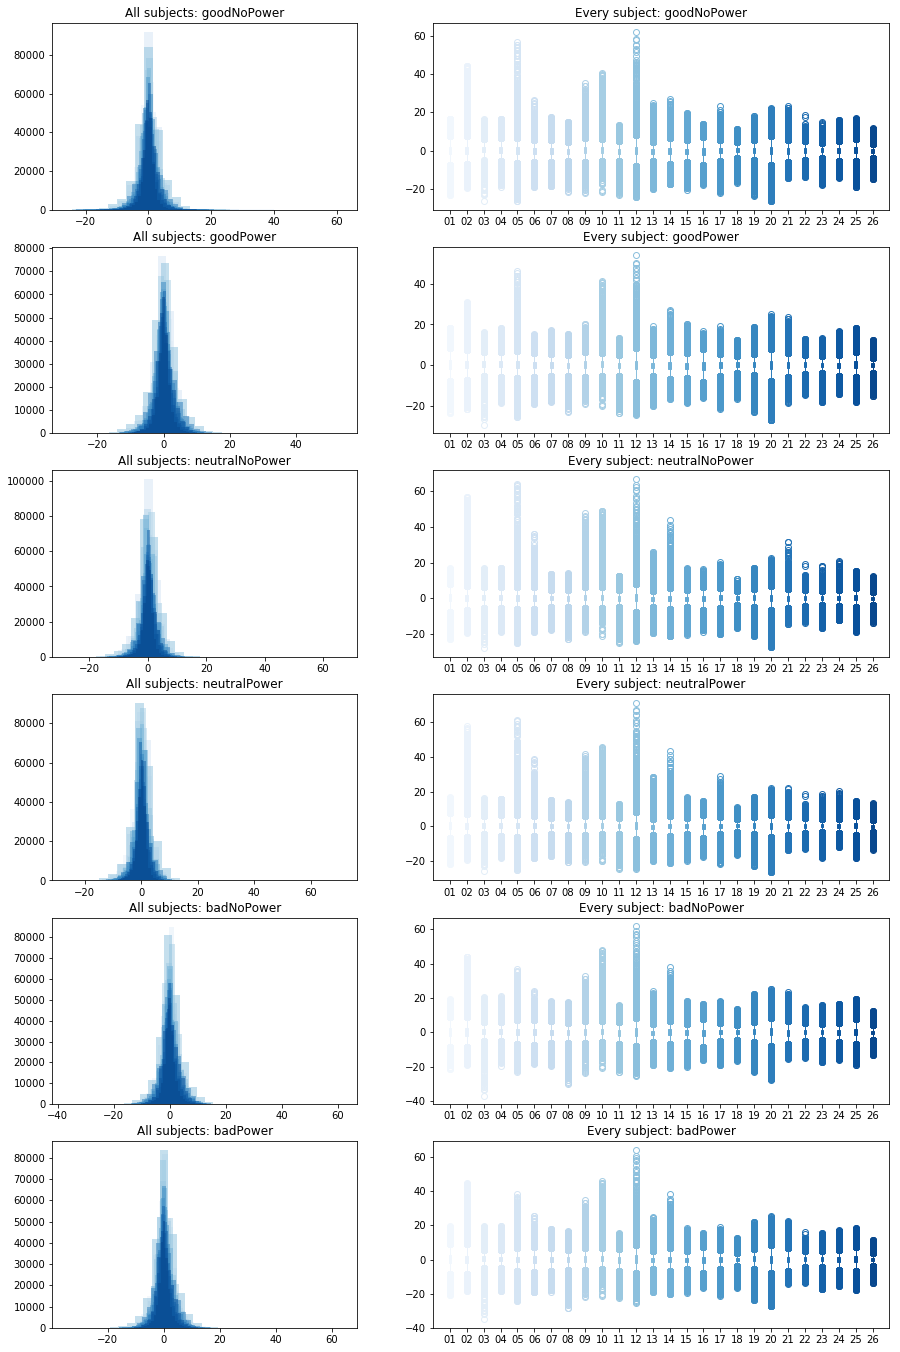

In [52]:
# Display histograms and boxplots, differentiating by condition. 
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (15, 24), gridspec_kw = {'width_ratios': [1, 1.5]})

for subject in range(0, 26):
    condition_index = 0
    
    # Get subject number. 
    subject_number = all_subjects[subject]
    
    for condition in ['goodNoPower', 'goodPower', 'neutralNoPower', 'neutralPower', 'badNoPower', 'badPower']:
        # Load data. 
        img = nib.load(data_path + 'sub-' + subject_number + '_appraisal-' + condition + '_betas.nii.gz')
        image_data = img.get_fdata()
        
        # Flatten the image and remove the NaN values. 
        flatten_image = image_data.flatten()
        flatten_image = flatten_image[~np.isnan(flatten_image)]
        
        # Define colormap and select a color for the subject. 
        cm = plt.cm.get_cmap('Blues')
        c = cm(0.035 * subject + 0.035)
        
        # Display the data and set titles. 
        axes[condition_index, 0].hist(flatten_image, bins = 30, alpha = 0.5, color = c)
        axes[condition_index, 0].set_title('All subjects: ' + condition)
        
        axes[condition_index, 1].boxplot(flatten_image, positions = [subject + 1], patch_artist = True,
            boxprops = dict(facecolor = c, color = c),
            capprops = dict(color = c),
            whiskerprops = dict(color = c),
            flierprops = dict(color = c, markeredgecolor = c),
            medianprops = dict(color = c),
            )
        axes[condition_index, 1].set_xlim(0, 27)
        axes[condition_index, 1].set_xticks(list(range(1, 27)))
        axes[condition_index, 1].set_xticklabels(all_subjects)
        axes[condition_index, 1].set_title('Every subject: ' + condition)
        
        # Increment the condition index. 
        condition_index += 1

Overall, we observe a **limited variability between conditions**, with a slight skewness to the right. For a given condition, the distributions of the values in the different subjects show some differences. As we can see in the boxplots, some subjects have consistently more extreme values across all conditions. 

### 5.3 Statistics through the three neurological views

In the following cells, we explore the number of non-NaN values, the sum of the values and the variance of the values across all the sections of the **sagittal, coronal and axial neurological views**. In this particular case, the sum of the values, which can be either positive or negative, seems to be a better metrics than the mean of the values. Indeed, some sections have few non-NaN values on which a mean could be performed, which makes the sum more robust. Apart from that, our objective is again to display the metrics that represent, respectively: 1) the average correlation between the brain activity and the experimental condition, 2) the distribution of this correlation, i.e. whether the brain regions are homogenously active during this condition, or on the contrary show some activation patterns with some regions more correlated than others. 

As previously, we differentiate the data **by subject or by condition**. We display the results as a series of plots with multiple lines. 

/Users/maeldonoso/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Degrees of freedom <= 0 for slice.
/Users/maeldonoso/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: Degrees of freedom <= 0 for slice.
/Users/maeldonoso/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Degrees of freedom <= 0 for slice.


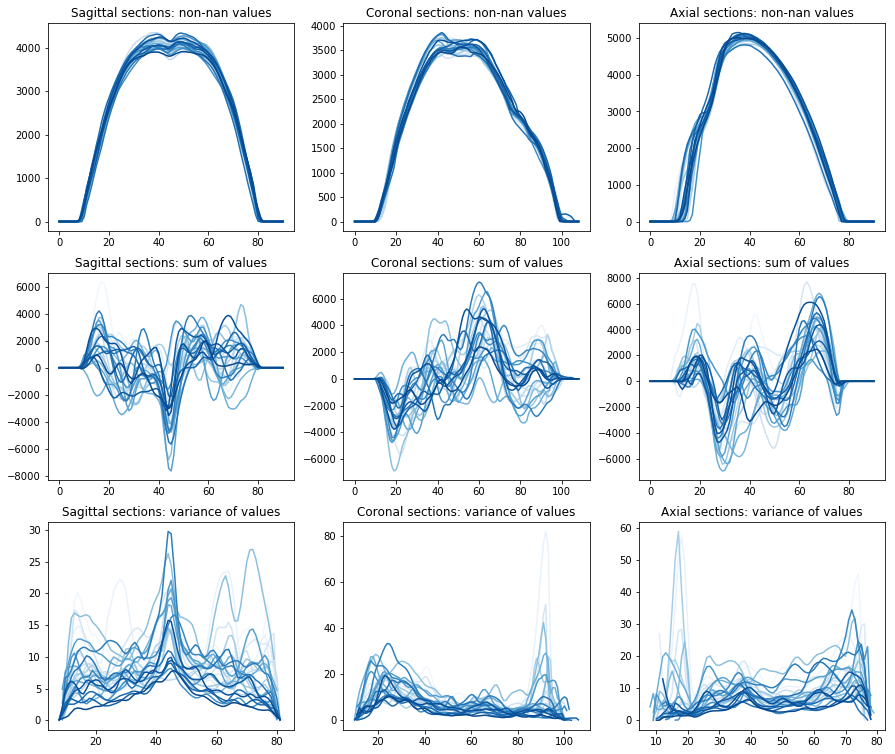

In [53]:
# Display statistics on several images, corresponding to the same condition on several subjects. 
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 13))

for subject in range(0, 26):
    # Get subject number. 
    subject_number = all_subjects[subject]
    
    # Load data from the 'no-power/good' condition. 
    img = nib.load(data_path + 'sub-' + subject_number + '_appraisal-goodNoPower_betas.nii.gz')
    image_data = img.get_fdata()
    
    # Sagittal view. 
    sagittal_nonnan_value = []
    sagittal_sum_value = []
    sagittal_var_value = []
    for sagittal_index in range(0, image_data.shape[0]):
        sagittal_nonnan_value.append(np.sum(~np.isnan(image_data[sagittal_index, :, :])))
        sagittal_sum_value.append(np.nansum(image_data[sagittal_index, :, :]))
        sagittal_var_value.append(np.nanvar(image_data[sagittal_index, :, :]))
        
    # Coronal view. 
    coronal_nonnan_value = []
    coronal_sum_value = []
    coronal_var_value = []
    for coronal_index in range(0, image_data.shape[1]):
        coronal_nonnan_value.append(np.sum(~np.isnan(image_data[:, coronal_index, :])))
        coronal_sum_value.append(np.nansum(image_data[:, coronal_index, :]))
        coronal_var_value.append(np.nanvar(image_data[:, coronal_index, :]))
        
    # Axial view. 
    axial_nonnan_value = []
    axial_sum_value = []
    axial_var_value = []
    for axial_index in range(0, image_data.shape[2]):
        axial_nonnan_value.append(np.sum(~np.isnan(image_data[:, :, axial_index])))
        axial_sum_value.append(np.nansum(image_data[:, :, axial_index]))
        axial_var_value.append(np.nanvar(image_data[:, :, axial_index]))
        
    # Define colormap and select a color for the subject. 
    cm = plt.cm.get_cmap('Blues')
    c = cm(0.035 * subject + 0.035)
        
    # Display the data. 
    axes[0, 0].plot(sagittal_nonnan_value, color = c)
    axes[0, 1].plot(coronal_nonnan_value, color = c)
    axes[0, 2].plot(axial_nonnan_value, color = c)
    axes[1, 0].plot(sagittal_sum_value, color = c)
    axes[1, 1].plot(coronal_sum_value, color = c)
    axes[1, 2].plot(axial_sum_value, color = c)
    axes[2, 0].plot(sagittal_var_value, color = c)
    axes[2, 1].plot(coronal_var_value, color = c)
    axes[2, 2].plot(axial_var_value, color = c)
    
    # Set titles. 
    axes[0, 0].set_title('Sagittal sections: non-nan values')
    axes[0, 1].set_title('Coronal sections: non-nan values')
    axes[0, 2].set_title('Axial sections: non-nan values')
    axes[1, 0].set_title('Sagittal sections: sum of values')
    axes[1, 1].set_title('Coronal sections: sum of values')
    axes[1, 2].set_title('Axial sections: sum of values')
    axes[2, 0].set_title('Sagittal sections: variance of values')
    axes[2, 1].set_title('Coronal sections: variance of values')
    axes[2, 2].set_title('Axial sections: variance of values')

Overall, we observe a **certain variability between subjects** concerning the distribution of the sum and the variance of the values across the neurological sections, whether for the sagittal, the coronal or the axial view. The distribution of non-NaN values also shows some differences, but the **shape is globally the same and corresponds to what we expected**, i.e. more non-NaN values at the center of the observation volume, where the brain is actually located. For the variance, we observe some extreme values for a few subjects, but this does not seem too strange, since these values are precisely located in the peripheral regions where there is little data, which can affect the variance. 

/Users/maeldonoso/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Degrees of freedom <= 0 for slice.
/Users/maeldonoso/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: Degrees of freedom <= 0 for slice.
/Users/maeldonoso/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: Degrees of freedom <= 0 for slice.


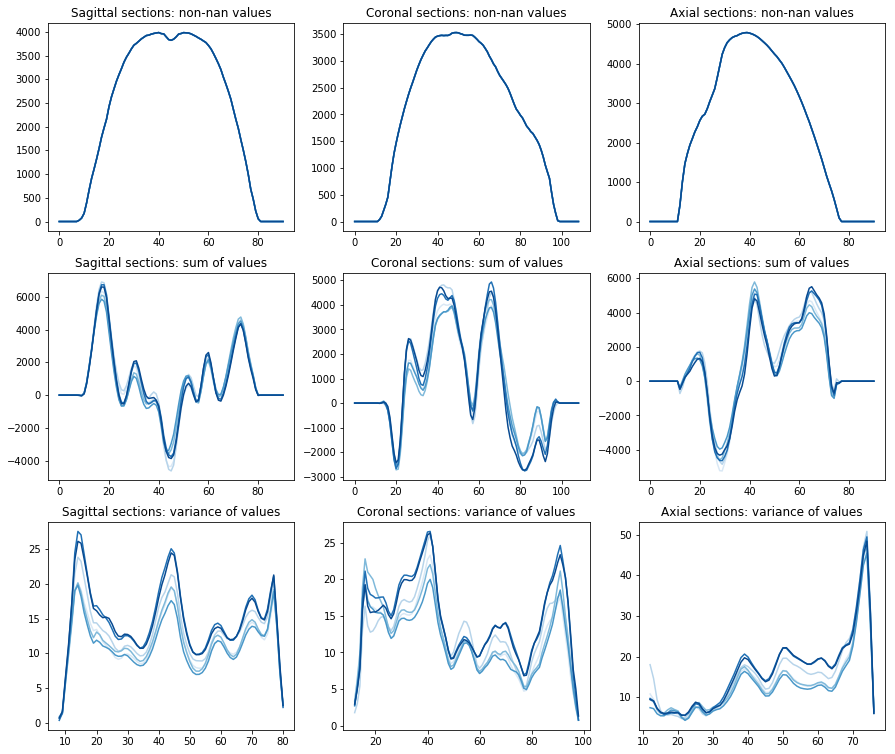

In [54]:
# Display statistics on several images, corresponding to several conditions on the same subject. 
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 13))
condition_index = 0

for condition in ['goodNoPower', 'goodPower', 'neutralNoPower', 'neutralPower', 'badNoPower', 'badPower']:
    # Increment the condition index. 
    condition_index += 1
    
    # Load data from the first subject. 
    img = nib.load(data_path + 'sub-01_appraisal-' + condition + '_betas.nii.gz')
    image_data = img.get_fdata()
    
    # Sagittal view. 
    sagittal_nonnan_value = []
    sagittal_sum_value = []
    sagittal_var_value = []
    for sagittal_index in range(0, image_data.shape[0]):
        sagittal_nonnan_value.append(np.sum(~np.isnan(image_data[sagittal_index, :, :])))
        sagittal_sum_value.append(np.nansum(image_data[sagittal_index, :, :]))
        sagittal_var_value.append(np.nanvar(image_data[sagittal_index, :, :]))
        
    # Coronal view. 
    coronal_nonnan_value = []
    coronal_sum_value = []
    coronal_var_value = []
    for coronal_index in range(0, image_data.shape[1]):
        coronal_nonnan_value.append(np.sum(~np.isnan(image_data[:, coronal_index, :])))
        coronal_sum_value.append(np.nansum(image_data[:, coronal_index, :]))
        coronal_var_value.append(np.nanvar(image_data[:, coronal_index, :]))
        
    # Axial view. 
    axial_nonnan_value = []
    axial_sum_value = []
    axial_var_value = []
    for axial_index in range(0, image_data.shape[2]):
        axial_nonnan_value.append(np.sum(~np.isnan(image_data[:, :, axial_index])))
        axial_sum_value.append(np.nansum(image_data[:, :, axial_index]))
        axial_var_value.append(np.nanvar(image_data[:, :, axial_index]))
        
    # Define colormap and select a color for the condition. 
    cm = plt.cm.get_cmap('Blues')
    c = cm(0.15 * condition_index)
    
    # Display the data. 
    axes[0, 0].plot(sagittal_nonnan_value, color = c)
    axes[0, 1].plot(coronal_nonnan_value, color = c)
    axes[0, 2].plot(axial_nonnan_value, color = c)
    axes[1, 0].plot(sagittal_sum_value, color = c)
    axes[1, 1].plot(coronal_sum_value, color = c)
    axes[1, 2].plot(axial_sum_value, color = c)
    axes[2, 0].plot(sagittal_var_value, color = c)
    axes[2, 1].plot(coronal_var_value, color = c)
    axes[2, 2].plot(axial_var_value, color = c)
    
    # Set titles. 
    axes[0, 0].set_title('Sagittal sections: non-nan values')
    axes[0, 1].set_title('Coronal sections: non-nan values')
    axes[0, 2].set_title('Axial sections: non-nan values')
    axes[1, 0].set_title('Sagittal sections: sum of values')
    axes[1, 1].set_title('Coronal sections: sum of values')
    axes[1, 2].set_title('Axial sections: sum of values')
    axes[2, 0].set_title('Sagittal sections: variance of values')
    axes[2, 1].set_title('Coronal sections: variance of values')
    axes[2, 2].set_title('Axial sections: variance of values')

Overall, we observe a **limited variability between conditions** concerning the distribution of the sum and the variance of the values across the neurological sections, whether for the sagittal, the coronal or the axial view. The distribution of non-NaN values is **identical between conditions**, which was expected since this distribution is only dependent on the subject. From a neuroimaging perspective, the fact that the sum and the variance of the values follow a distinctive pattern along a given neurological view is quite interesting: these patterns reveal a little bit of the actual physiology of the brain, where some regions are more active than others for a given experimental condition. Interestingly, the plots corresponding to the sagittal sections show a certain symmetry, corresponding to the actual symmetry of the brain between the left and the right hemispheres. 

### 5.4 Visual similarities and differences between conditions

In the following celles, in order to visually represent the similarities and differences between conditions, we sum up the middle axial section of the statistical maps, condition by condition, for all the subjects. We also display the differences between the sum images, using a different colormap. 

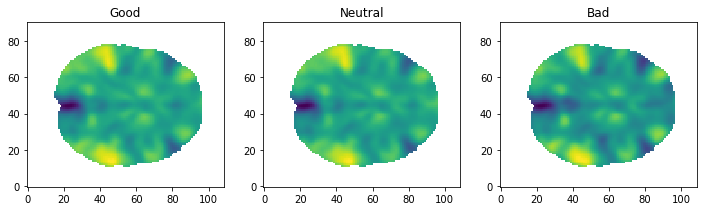

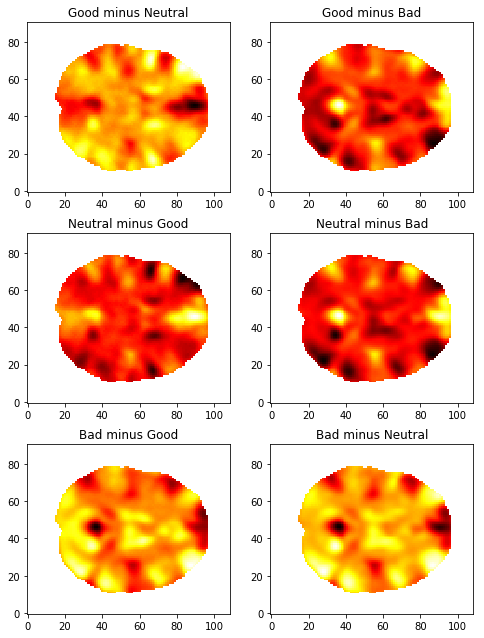

In [55]:
# Create arrays for the sum images. 
sum_image_data_good = np.zeros(image_data.shape)
sum_image_data_neutral = np.zeros(image_data.shape)
sum_image_data_bad = np.zeros(image_data.shape)

for subject in range(0, 26):
    # Get subject number. 
    subject_number = all_subjects[subject]
    
    # Load data from the 'no-power/good' condition and fill in the sum image. 
    img = nib.load(data_path + 'sub-' + subject_number + '_appraisal-goodNoPower_betas.nii.gz')
    image_data = img.get_fdata()
    sum_image_data_good[:, :, middle_coord[2]] += image_data[:, :, middle_coord[2]];
    
    # Load data from the 'no-power/neutral' condition and fill in the sum image. 
    img = nib.load(data_path + 'sub-' + subject_number + '_appraisal-neutralNoPower_betas.nii.gz')
    image_data = img.get_fdata()
    sum_image_data_neutral[:, :, middle_coord[2]] += image_data[:, :, middle_coord[2]];
    
    # Load data from the 'no-power/bad' condition and fill in the sum image. 
    img = nib.load(data_path + 'sub-' + subject_number + '_appraisal-badNoPower_betas.nii.gz')
    image_data = img.get_fdata()
    sum_image_data_bad[:, :, middle_coord[2]] += image_data[:, :, middle_coord[2]]
    
# Display the sum images. 
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 7))
axes[0].imshow(sum_image_data_good[:, :, middle_coord[2]], origin = 'lower')
axes[0].set_title('Good')
axes[1].imshow(sum_image_data_neutral[:, :, middle_coord[2]], origin = 'lower')
axes[1].set_title('Neutral')
axes[2].imshow(sum_image_data_bad[:, :, middle_coord[2]], origin = 'lower')
axes[2].set_title('Bad')

# Display the differences between the sum images. 
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (8, 11))
axes[0, 0].imshow(np.subtract(sum_image_data_good[:, :, middle_coord[2]], sum_image_data_neutral[:, :, middle_coord[2]]), 
                  origin = 'lower', cmap = plt.get_cmap('hot'));
axes[0, 0].set_title('Good minus Neutral')
axes[0, 1].imshow(np.subtract(sum_image_data_good[:, :, middle_coord[2]], sum_image_data_bad[:, :, middle_coord[2]]), 
                  origin = 'lower', cmap = plt.get_cmap('hot'));
axes[0, 1].set_title('Good minus Bad')

axes[1, 0].imshow(np.subtract(sum_image_data_neutral[:, :, middle_coord[2]], sum_image_data_good[:, :, middle_coord[2]]), 
                  origin = 'lower', cmap = plt.get_cmap('hot'));
axes[1, 0].set_title('Neutral minus Good')
axes[1, 1].imshow(np.subtract(sum_image_data_neutral[:, :, middle_coord[2]], sum_image_data_bad[:, :, middle_coord[2]]), 
                  origin = 'lower', cmap = plt.get_cmap('hot'));
axes[1, 1].set_title('Neutral minus Bad')

axes[2, 0].imshow(np.subtract(sum_image_data_bad[:, :, middle_coord[2]], sum_image_data_good[:, :, middle_coord[2]]), 
                  origin = 'lower', cmap = plt.get_cmap('hot'));
axes[2, 0].set_title('Bad minus Good')
axes[2, 1].imshow(np.subtract(sum_image_data_bad[:, :, middle_coord[2]], sum_image_data_neutral[:, :, middle_coord[2]]), 
                  origin = 'lower', cmap = plt.get_cmap('hot'));
axes[2, 1].set_title('Bad minus Neutral');

While the resulting sum maps are indeed different, it is **quite difficult to notice these differences visually** if we look only at the first three images. In particular, the good and neutral conditions have very similar statistical maps. It would be interesting to know if despite these small differences, classification models can still reach a certain performance. 

### 5.5 Relationship between the features and the target

In the following cells, **we pool all the subjects and get all the values associated to the good, neutral and bad conditions**. We display these values using histograms and a boxplot, in order to explore possible relationships between the features and the target. 

In [56]:
# Pool all the subjects and get all the values associated to the good, neutral and bad conditions. 
dimensionality = np.prod(image_data.shape)
good_values = np.ndarray(dimensionality * 26 * 2)
neutral_values = np.ndarray(dimensionality * 26 * 2)
bad_values = np.ndarray(dimensionality * 26 * 2)
good_index = 0
neutral_index = 0
bad_index = 0

for subject in range(0, 26):
    # Get subject number. 
    subject_number = all_subjects[subject]
    
    for condition in ['goodNoPower', 'goodPower', 'neutralNoPower', 'neutralPower', 'badNoPower', 'badPower']:
        # Load data. 
        img = nib.load(data_path + 'sub-' + subject_number + '_appraisal-' + condition + '_betas.nii.gz')
        image_data = img.get_fdata()
        
        # Flatten the image. 
        flatten_image = image_data.flatten()
        
        # Add the data to the relevant array. 
        if condition in ['goodNoPower', 'goodPower']:
            good_values[(good_index * dimensionality):(good_index * dimensionality) + dimensionality] = flatten_image
            good_index += 1
        if condition in ['neutralNoPower', 'neutralPower']:
            neutral_values[(neutral_index * dimensionality):(neutral_index * dimensionality) + dimensionality] = flatten_image
            neutral_index += 1
        if condition in ['badNoPower', 'badPower']:
            bad_values[(bad_index * dimensionality):(bad_index * dimensionality) + dimensionality] = flatten_image
            bad_index += 1
            
# Remove the NaN values. 
good_values = good_values[~np.isnan(good_values)]
neutral_values = neutral_values[~np.isnan(neutral_values)]
bad_values = bad_values[~np.isnan(bad_values)]

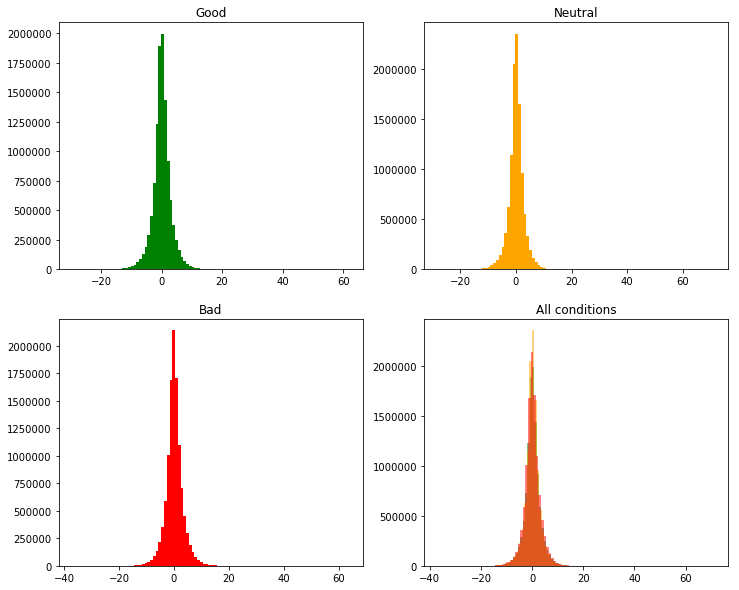

In [57]:
# Explore the values associated to the good, neutral and bad conditions with histograms. 
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 10))

axes[0, 0].hist(good_values, bins = 100, color = 'green')
axes[0, 0].set_title('Good')
axes[0, 1].hist(neutral_values, bins = 100, color = 'orange')
axes[0, 1].set_title('Neutral')
axes[1, 0].hist(bad_values, bins = 100, color = 'red')
axes[1, 0].set_title('Bad')
axes[1, 1].hist(good_values, bins = 100, alpha = 0.5, color = 'green')
axes[1, 1].hist(neutral_values, bins = 100, alpha = 0.5, color = 'orange')
axes[1, 1].hist(bad_values, bins = 100, alpha = 0.5, color = 'red')
axes[1, 1].set_title('All conditions');

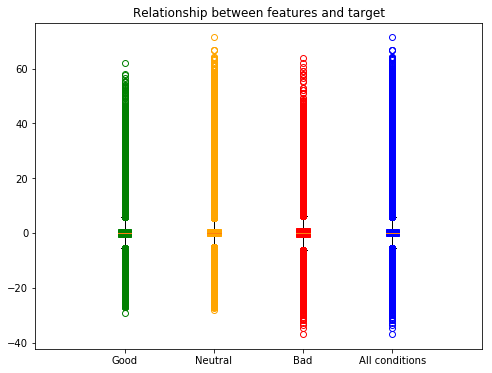

In [58]:
# Explore the values associated to the good, neutral and bad conditions with a boxplot. 
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))

axes.boxplot(good_values, positions = [1], patch_artist = True,
            boxprops = dict(facecolor = 'green', color = 'green'),
            flierprops = dict(color = 'green', markeredgecolor = 'green'),
            )
axes.boxplot(neutral_values, positions = [2], patch_artist = True,
            boxprops = dict(facecolor = 'orange', color = 'orange'),
            flierprops = dict(color = 'orange', markeredgecolor = 'orange'),
            )
axes.boxplot(bad_values, positions = [3], patch_artist = True,
            boxprops = dict(facecolor = 'red', color = 'red'),
            flierprops = dict(color = 'red', markeredgecolor = 'red'),
            )
axes.boxplot(np.concatenate((good_values, neutral_values, bad_values)), positions = [4], patch_artist = True,
            boxprops = dict(facecolor = 'blue', color = 'blue'),
            flierprops = dict(color = 'blue', markeredgecolor = 'blue'),
            )
axes.set_xlim(0, 5)
axes.set_xticks(list(range(1, 5)))
axes.set_xticklabels(['Good', 'Neutral', 'Bad', 'All conditions'])
axes.set_title('Relationship between features and target');

Neither the histograms nor the boxplot seem to show any relevant relationship between the features and the target. Overall, **the values associated to the good, neutral and bad conditions seem to follow the same type of distribution**. These graphs confirm our previous observations about the limited variability between conditions. 

### 5.6 Principal Components Analysis (PCA)

In the following cells, we perform a Principal Component Analysis (PCA) on the features, and **extract a new feature array of 156 x 156 features**. Then, we examine the proportion of variance explained, and display a scatter plot of the two first components. Since the dimensionality is much higher than the cardinality in our dataset, performing a PCA is a natural step to try to reduce this dimensionality. 

In [59]:
# Create a NumPy array for the features. 
features = np.zeros((156, np.prod(image_dimensions)))
features.shape

(156, 902629)

In [60]:
# Load all the features in the features array. 
file_increment = 0

for subject in range(0, 26):
    condition_index = 0
    
    # Get subject number. 
    subject_number = all_subjects[subject]
    
    for condition in ['goodNoPower', 'goodPower', 'neutralNoPower', 'neutralPower', 'badNoPower', 'badPower']:
        # Load data. 
        img = nib.load(data_path + 'sub-' + subject_number + '_appraisal-' + condition + '_betas.nii.gz')
        image_data = img.get_fdata()
        
        # Flatten the image. 
        image_flatten = image_data.flatten()
        
        # Replace NaN values by zero. 
        image_preprocessed = np.nan_to_num(image_flatten)
        
        # Store the image in the NumPy array. 
        features[file_increment, :] = image_preprocessed
                
        # Increment file index. 
        file_increment += 1

In [61]:
# Create Standard scaler. 
scaler = StandardScaler()

# Rescale data. 
features_rescaled = scaler.fit_transform(features)

In [62]:
# Create PCA transformer. 
pca = PCA(n_components = None)

# Apply PCA to the data. 
pca.fit(features_rescaled)

# Project data onto the selected components. 
features_pca = pca.transform(features_rescaled)

In [63]:
# Display shape of the features array after PCA. 
features_pca.shape

(156, 156)

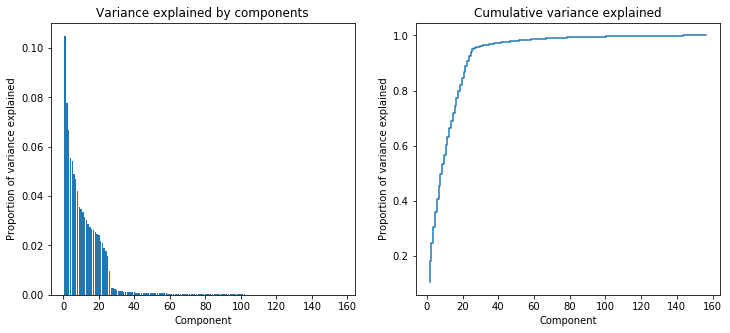

In [64]:
# Get the proportion of variance explained. 
pve = pca.explained_variance_ratio_

# Display a scree plot with two graphs. 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

# Create bar plot. 
xcor = np.arange(1, len(pve) + 1)
axes[0].bar(xcor, pve)
axes[0].set_xlabel('Component')
axes[0].set_ylabel('Proportion of variance explained')
axes[0].set_title('Variance explained by components')

# Create cumulative sum plot. 
pve_cumsum = np.cumsum(pve)
axes[1].step(xcor + 0.5, pve_cumsum)
axes[1].set_xlabel('Component')
axes[1].set_ylabel('Proportion of variance explained')
axes[1].set_title('Cumulative variance explained');

The scree plot, that we display in two separated graphs for clarity, shows a **drop in the variance explained** around the 26th component. We explore further these components in the following cells. 

In [65]:
# Verify how many PCA components explain 10%, 20%, …, 90% and 100% of the variance. 
PCA_results = pd.DataFrame()
PCA_results['Percentage explained'] = np.linspace(10, 100, 10, dtype = int)
nb_components = []
for percentage in PCA_results['Percentage explained']:
    idx_under_threshold = (pve_cumsum < percentage / 100)
    nb_components.append(np.sum(idx_under_threshold) + 1)

# Display the results. 
PCA_results['Number of components necessary'] = nb_components
PCA_results

Percentage explained  Number of components necessary
0                    10                               1
1                    20                               3
2                    30                               4
3                    40                               6
4                    50                               9
5                    60                              11
6                    70                              15
7                    80                              19
8                    90                              23
9                   100                             155

In [66]:
# Display the variance explained by the 26 first components. 
print('Variance explained by the 26 first components:')
print(pve[0:26])

# Display the variance explained by the 26 following components. 
print('Variance explained by the 26 following components:')
print(pve[26:52])

Variance explained by the 26 first components:
[0.10492814 0.07794746 0.06667416 0.05564216 0.05431901 0.04881683
 0.04678297 0.04196087 0.03559863 0.03487995 0.03360075 0.03144033
 0.03013086 0.02854548 0.02740659 0.02659936 0.02636484 0.02553221
 0.02454884 0.02404614 0.02191578 0.02099205 0.01914472 0.01756259
 0.01569443 0.00960803]
Variance explained by the 26 following components:
[0.00295188 0.00268804 0.0021579  0.00196205 0.00170136 0.0015462
 0.00142882 0.00122024 0.00118815 0.00112262 0.00103697 0.00099834
 0.00097035 0.00093729 0.00090547 0.0008664  0.00083597 0.00080711
 0.00076978 0.00074286 0.00071058 0.00070219 0.00067898 0.00065596
 0.00064096 0.00062544]


We notice that indeed, the proportion of variance explained drops after the 26th component. Since we have 26 subjects in our data, and saw previously that there is much more variability between subjects than between conditions, a natural explanation would be that somehow, **the 26 first components reflect mostly the subject variability**. We explore this hypothesis by displaying a scatter plot of the two first components, and then restricting this scatter plot to the data points corresponding to the two first subjects. 

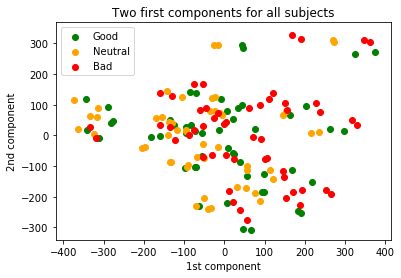

In [67]:
# Specify the indexes corresponding to every target class. 
good_indexes = ([True, True, False, False, False, False] * 26)
neutral_indexes = ([False, False, True, True, False, False] * 26)
bad_indexes = ([False, False, False, False, True, True] * 26)

# Display a scatter plot. 
plt.scatter(features_pca[good_indexes, 0], features_pca[good_indexes, 1], label = 'Good', color = 'green')
plt.scatter(features_pca[neutral_indexes, 0], features_pca[neutral_indexes, 1], label = 'Neutral', color = 'orange')
plt.scatter(features_pca[bad_indexes, 0], features_pca[bad_indexes, 1], label = 'Bad', color = 'red')

# Add labels and legend. 
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('Two first components for all subjects');

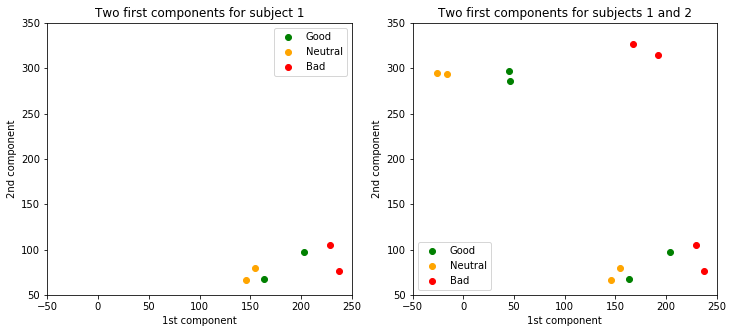

In [68]:
# Display two scatter plots. 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
for plot_index in range(0, 2):
    
    # In the first graph, show only the first subject. 
    if plot_index == 0:
        good_indexes = ([True, True, False, False, False, False])
        neutral_indexes = ([False, False, True, True, False, False])
        bad_indexes = ([False, False, False, False, True, True])
        axes[plot_index].set_title('Two first components for subject 1')
        
    # In the second graph, show the two first subjects. 
    elif plot_index == 1:
        good_indexes = ([True, True, False, False, False, False] * 2)
        neutral_indexes = ([False, False, True, True, False, False] * 2)
        bad_indexes = ([False, False, False, False, True, True] * 2)
        axes[plot_index].set_title('Two first components for subjects 1 and 2')
    
    # Fill in the indexes. 
    for index in range(0, 156 - len(good_indexes)):
        good_indexes.append(False)
        neutral_indexes.append(False)
        bad_indexes.append(False)
    
    # Display a scatter plot. 
    axes[plot_index].scatter(features_pca[good_indexes, 0], features_pca[good_indexes, 1], label = 'Good', color = 'green')
    axes[plot_index].scatter(features_pca[neutral_indexes, 0], features_pca[neutral_indexes, 1], label = 'Neutral', color = 'orange')
    axes[plot_index].scatter(features_pca[bad_indexes, 0], features_pca[bad_indexes, 1], label = 'Bad', color = 'red')
    
    # For the PCA with rescaling, use these scales for a better visualization. 
    axes[plot_index].set_xlim(-50, 250)
    axes[plot_index].set_ylim(50, 350)
    
    # If the PCA is performed without rescaling, use these scales for a better visualization. 
    #axes[plot_index].set_xlim(0, 600)
    #axes[plot_index].set_ylim(-50, 1200)

    # Add labels and legend. 
    axes[plot_index].legend()
    axes[plot_index].set_xlabel('1st component')
    axes[plot_index].set_ylabel('2nd component');

From these graphs, we get two important informations. First, when we plot the two first components for all the subjects, there seem to be no cluster or pattern of interest regarding the target: **the data points associated to the good, neutral and bad conditions are mostly intertwined**. Second, when we restrict the graphs to the first and the two first subjects, we can see that indeed, the two first dimensions from the PCA seem to be closely related to the two first subjects in our dataset. Therefore, **our new features space seem to be highly biased by the subject variability**. 

Our PCA was performed with a preliminary step of features rescaling, but the results are very similar if we remove the rescaling step. For all these reasons, it does not seem relevant to use the components extracted from the PCA as features for our machine learning models. 

### 5.7 Insights and possible difficulties

#### Insights from the EDA

Overall, we obtain three main informations from this EDA. 

First, **the data seems of good quality**, in the sense that no aberration was found through the DataFrames or the statistical graphs. There is no obvious outlier in the data, the peripheral regions have indeed more NaN values than the central regions, and the left-right symetry of the brain is reflected on the plots. Therefore, no outlier removal or additional cleaning step seem to be necessary in our data analysis pipeline, and we should be able to use the raw data without modification, except for the voxel size rescaling. We should remind that we are not working with raw data directly from the fMRI scanner, but rather with statistical maps already preprocessed and normalized. In general, significant outliers are not expected at this stage of a neuroimaging pipeline. 

Second, **the variability between subjects is significantly higher than the variability between conditions**. This difference is visible throughout most of our EDA, including the DataFrames, the graphs showing the distribution of the values in general and through the different neurological views, and the results of our PCA. 

Third, at this level of analysis, **there seem to be no clear relationship between the features and the target**. Therefore, using the experimental conditions as the target variable could actually be quite challenging. At this point, we can already guess that it would be necessary to try and fine-tune several classification and regression models in order to achieve a reasonable performance. On the other hand, this difficulty could also be a good rationale to use machine learning models, in order to find patterns that are not visually obvious or easily noticeable after the EDA. 

#### Possible difficulties for this project

Before proceeding to the data extraction, we should also discuss two possible difficulties. 

First, as we noticed before, **the dimensionality of our dataset is much higher than its cardinality**. When using machine learning models, this could be an issue, often referred to as the curse of dimensionality. Nevertheless, we can reasonably think that this issue should have a limited impact in our case. The difficulties associated to the curse of dimensionality really arise when each feature has only a limited range of possible values, because in these cases, the train set should be large enough to provide several samples of each combination of values (https://en.wikipedia.org/wiki/Curse_of_dimensionality). In our case, we work with **continuous data in the float64 format**, therefore the range of possible values for each feature is very large, and the curse of dimensionality may not be a major issue. 

Second, the EDA seems to show that the problem is quite challenging, and that the human eye can not easily distinguish between the different conditions. Therefore, **it is natural to ask ourselves whether a machine learning solution is possible at all**. Nevertheless, we could be here in a situation where machine learning models are expected to perform better than the human eye. Indeed, our dataset is composed of **well-structured, highly-normalized, multidimensional statistical maps**. While the human eye has not evolved to recognize these types of patterns, a machine learning model might more easily identify its hidden patterns. Of course, considering the hardness of the problem, we will not hope for a perfect performance of our models, but we can reasonably expect that they will perform better than the level of chance. 

## **6. Data extraction and preprocessing**

### 6.1 Data extraction

In the following cells, we extract the **features and target variables**, and store them in NumPy arrays. For the features, we keep the original 3D format for the convolutional networks, but we flatten the data for all the other models. 

In [69]:
# Define the files list length. 
files_length = 156

# Create NumPy arrays. 
features = np.zeros((files_length, np.prod(image_dimensions)))
features_r2 = np.zeros((files_length, np.prod(image_dimensions_r2)))
features_r3 = np.zeros((files_length, np.prod(image_dimensions_r3)))
features_r4 = np.zeros((files_length, np.prod(image_dimensions_r4)))

# Create NumPy arrays for convolutional networks. 
features_convnet = np.zeros((files_length, image_dimensions[0], image_dimensions[1], image_dimensions[2]))
features_convnet_r2 = np.zeros((files_length, image_dimensions_r2[0], image_dimensions_r2[1], image_dimensions_r2[2]))
features_convnet_r3 = np.zeros((files_length, image_dimensions_r3[0], image_dimensions_r3[1], image_dimensions_r3[2]))
features_convnet_r4 = np.zeros((files_length, image_dimensions_r4[0], image_dimensions_r4[1], image_dimensions_r4[2]))

# Display the shape of the arrays. 
print('features:   ', features.shape)
print('features_r2:', features_r2.shape)
print('features_r3:', features_r3.shape)
print('features_r4:', features_r4.shape)
print('features_convnet:   ', features_convnet.shape)
print('features_convnet_r2:', features_convnet_r2.shape)
print('features_convnet_r3:', features_convnet_r3.shape)
print('features_convnet_r4:', features_convnet_r4.shape)

features:    (156, 902629)
features_r2: (156, 109350)
features_r3: (156, 32400)
features_r4: (156, 13068)
features_convnet:    (156, 91, 109, 91)
features_convnet_r2: (156, 45, 54, 45)
features_convnet_r3: (156, 30, 36, 30)
features_convnet_r4: (156, 22, 27, 22)


In [70]:
# Load all the features in the features arrays. 
file_increment = 0

for subject in range(0, 26):
    condition_index = 0
    
    # Get subject number. 
    subject_number = all_subjects[subject]
    
    for condition in ['goodNoPower', 'goodPower', 'neutralNoPower', 'neutralPower', 'badNoPower', 'badPower']:
        # Information. 
        if (file_increment % 10) == 0:
            print('Starting step:', str(file_increment), '/', str(files_length))
        
        # Load data. 
        img = nib.load(data_path + 'sub-' + subject_number + '_appraisal-' + condition + '_betas.nii.gz')
        image_data = img.get_fdata()
        
        # Rescale the images. 
        image_data_r2, _ = rescale_image_by_factor(image_data, 2)
        image_data_r3, _ = rescale_image_by_factor(image_data, 3)
        image_data_r4, _ = rescale_image_by_factor(image_data, 4)

        # Flatten the images. 
        image_flatten = image_data.flatten()
        image_flatten_r2 = image_data_r2.flatten()
        image_flatten_r3 = image_data_r3.flatten()
        image_flatten_r4 = image_data_r4.flatten()

        # Store the images in the NumPy arrays. 
        features[file_increment, :] = image_flatten
        features_r2[file_increment, :] = image_flatten_r2
        features_r3[file_increment, :] = image_flatten_r3
        features_r4[file_increment, :] = image_flatten_r4

        # Store the images in the NumPy arrays for convolutional networks. 
        features_convnet[file_increment, :, :, :] = image_data
        features_convnet_r2[file_increment, :, :, :] = image_data_r2
        features_convnet_r3[file_increment, :, :, :] = image_data_r3
        features_convnet_r4[file_increment, :, :, :] = image_data_r4
                
        # Increment the condition index and the file index. 
        condition_index += 1
        file_increment += 1
        
print('Done.')

Starting step: 0 / 156
Starting step: 10 / 156
Starting step: 20 / 156
Starting step: 30 / 156
Starting step: 40 / 156
Starting step: 50 / 156
Starting step: 60 / 156
Starting step: 70 / 156
Starting step: 80 / 156
Starting step: 90 / 156
Starting step: 100 / 156
Starting step: 110 / 156
Starting step: 120 / 156
Starting step: 130 / 156
Starting step: 140 / 156
Starting step: 150 / 156
Done.


In [71]:
# Define the target array. 
target = np.array(['good', 'good', 'neutral', 'neutral', 'bad', 'bad'] * 26)
target.shape

(156,)

In [72]:
# Display the target array. 
target

array(['good', 'good', 'neutral', 'neutral', 'bad', 'bad', 'good', 'good',
       'neutral', 'neutral', 'bad', 'bad', 'good', 'good', 'neutral',
       'neutral', 'bad', 'bad', 'good', 'good', 'neutral', 'neutral',
       'bad', 'bad', 'good', 'good', 'neutral', 'neutral', 'bad', 'bad',
       'good', 'good', 'neutral', 'neutral', 'bad', 'bad', 'good', 'good',
       'neutral', 'neutral', 'bad', 'bad', 'good', 'good', 'neutral',
       'neutral', 'bad', 'bad', 'good', 'good', 'neutral', 'neutral',
       'bad', 'bad', 'good', 'good', 'neutral', 'neutral', 'bad', 'bad',
       'good', 'good', 'neutral', 'neutral', 'bad', 'bad', 'good', 'good',
       'neutral', 'neutral', 'bad', 'bad', 'good', 'good', 'neutral',
       'neutral', 'bad', 'bad', 'good', 'good', 'neutral', 'neutral',
       'bad', 'bad', 'good', 'good', 'neutral', 'neutral', 'bad', 'bad',
       'good', 'good', 'neutral', 'neutral', 'bad', 'bad', 'good', 'good',
       'neutral', 'neutral', 'bad', 'bad', 'good', 'good', 'n

### 6.2 Data preprocessing

For most of the machine learning models that we will use, the 3D arrays must be flattened. When this is the case, **we remove all the voxels that systematically contain NaN values in all the statistical maps**. In a typical neuroimaging analysis pipeline, these voxels correspond to the volumes located outside the brain, and are often eliminated through a global binary mask applied to all the subjects. 

The remaining NaN values can vary between subjects, and are usually due to the variability of the subjects positions inside the fMRI scanner, where some parts of the brain may move outside the observation volume. **We replace these remaining NaN values by zero**, which seems to be a good default value for statistical maps, since by construction, zero corresponds to the absence of any correlation or anti-correlation. 

For the convolutional neural networks, on the other hand, we must keep the shape of the 3D arrays. In this case, **we replace directly all the NaN values by zero**. 

In [73]:
def count_nan_elements(features):
    print(str(len(features[np.isnan(features)])), 'NaN elements')
    print(str(len(features[~np.isnan(features)])), 'non-NaN elements')
    print(str(np.round(100 * len(features[np.isnan(features)]) / np.prod(features.shape), 2)) + '% elements are NaN')

In [74]:
def remove_systematic_nan_elements(features):
    # Create a NumPy array. 
    all_nan_indexes = np.zeros(features.shape[1])

    # Loop over all the voxels and check if they contain NaN values in every image. 
    for voxel_index in range(0, features.shape[1]):
        if np.isnan(features[:, voxel_index]).sum() == features.shape[0]:
            all_nan_indexes[voxel_index] = 1

    # Convert the datatype to Boolean. 
    all_nan_indexes = all_nan_indexes.astype(bool)

    # Remove the voxels that contain NaN values in every image. 
    features_preprocessed = features[:, ~all_nan_indexes]
    
    # Information. 
    print('Shape before preprocessing:', features.shape)
    print('Shape after preprocessing: ', features_preprocessed.shape)
    
    return features_preprocessed

In [75]:
# Display number and proportion of NaN elements. 
for feature_array in ['features', 'features_r2', 'features_r3', 'features_r4']:
    print('Array ' + feature_array + ':')
    count_nan_elements(eval(feature_array))
    print()

Array features:
107287086 NaN elements
33523038 non-NaN elements
76.19% elements are NaN

Array features_r2:
13159320 NaN elements
3899280 non-NaN elements
77.14% elements are NaN

Array features_r3:
3981714 NaN elements
1072686 non-NaN elements
78.78% elements are NaN

Array features_r4:
1618338 NaN elements
420270 non-NaN elements
79.38% elements are NaN



In [76]:
# Remove systematic NaN values: original data. 
print('Array features:')
features_preprocessed = remove_systematic_nan_elements(features)

Array features:
Shape before preprocessing: (156, 902629)
Shape after preprocessing:  (156, 256007)


In [77]:
# Remove systematic NaN values: voxel size rescaled by a factor 2. 
print('Array features_r2:')
features_preprocessed_r2 = remove_systematic_nan_elements(features_r2)

Array features_r2:
Shape before preprocessing: (156, 109350)
Shape after preprocessing:  (156, 29729)


In [78]:
# Remove systematic NaN values: voxel size rescaled by a factor 3. 
print('Array features_r3:')
features_preprocessed_r3 = remove_systematic_nan_elements(features_r3)

Array features_r3:
Shape before preprocessing: (156, 32400)
Shape after preprocessing:  (156, 8171)


In [79]:
# Remove systematic NaN values: voxel size rescaled by a factor 4. 
print('Array features_r4:')
features_preprocessed_r4 = remove_systematic_nan_elements(features_r4)

Array features_r4:
Shape before preprocessing: (156, 13068)
Shape after preprocessing:  (156, 3180)


In [80]:
# Display number and proportion of NaN elements. 
for feature_array in ['features_preprocessed', 'features_preprocessed_r2', 'features_preprocessed_r3', 'features_preprocessed_r4']:
    print('Array ' + feature_array + ':')
    count_nan_elements(eval(feature_array))
    print()

Array features_preprocessed:
6414054 NaN elements
33523038 non-NaN elements
16.06% elements are NaN

Array features_preprocessed_r2:
738444 NaN elements
3899280 non-NaN elements
15.92% elements are NaN

Array features_preprocessed_r3:
201990 NaN elements
1072686 non-NaN elements
15.85% elements are NaN

Array features_preprocessed_r4:
75810 NaN elements
420270 non-NaN elements
15.28% elements are NaN



In [81]:
# Convert remaining NaN values into zeros. 
features_preprocessed = np.nan_to_num(features_preprocessed)
features_preprocessed_r2 = np.nan_to_num(features_preprocessed_r2)
features_preprocessed_r3 = np.nan_to_num(features_preprocessed_r3)
features_preprocessed_r4 = np.nan_to_num(features_preprocessed_r4)
features_convnet = np.nan_to_num(features_convnet)
features_convnet_r2 = np.nan_to_num(features_convnet_r2)
features_convnet_r3 = np.nan_to_num(features_convnet_r3)
features_convnet_r4 = np.nan_to_num(features_convnet_r4)

In [82]:
# Display number and proportion of NaN elements. 
for feature_array in ['features_preprocessed', 'features_preprocessed_r2', 'features_preprocessed_r3', 'features_preprocessed_r4']:
    print('Array ' + feature_array + ':')
    count_nan_elements(eval(feature_array))
    print()

Array features_preprocessed:
0 NaN elements
39937092 non-NaN elements
0.0% elements are NaN

Array features_preprocessed_r2:
0 NaN elements
4637724 non-NaN elements
0.0% elements are NaN

Array features_preprocessed_r3:
0 NaN elements
1274676 non-NaN elements
0.0% elements are NaN

Array features_preprocessed_r4:
0 NaN elements
496080 non-NaN elements
0.0% elements are NaN



### 6.3 Create and save datasets

Finally, we divide our dataset into a train+valid set and a test set. Specifically, **we take the first 20 subjects as the train+valid set, and the last 6 subjects as the test set**. Since each subject is associated to 6 statistical maps, this division gives us **120 statistical maps for the train+valid set, and 36 statistical maps for the test set**. We save the datasets into a .npz file. 

In [83]:
# Define the threshold. 
threshold = 120

# Create the train+valid sets for the features. 
features_preprocessed_tr = features_preprocessed[0:threshold, :]
features_preprocessed_r2_tr = features_preprocessed_r2[0:threshold, :]
features_preprocessed_r3_tr = features_preprocessed_r3[0:threshold, :]
features_preprocessed_r4_tr = features_preprocessed_r4[0:threshold, :]
features_convnet_tr = features_convnet[0:threshold, :]
features_convnet_r2_tr = features_convnet_r2[0:threshold, :]
features_convnet_r3_tr = features_convnet_r3[0:threshold, :]
features_convnet_r4_tr = features_convnet_r4[0:threshold, :]

# Create the test sets for the features. 
features_preprocessed_te = features_preprocessed[threshold:, :]
features_preprocessed_r2_te = features_preprocessed_r2[threshold:, :]
features_preprocessed_r3_te = features_preprocessed_r3[threshold:, :]
features_preprocessed_r4_te = features_preprocessed_r4[threshold:, :]
features_convnet_te = features_convnet[threshold:, :]
features_convnet_r2_te = features_convnet_r2[threshold:, :]
features_convnet_r3_te = features_convnet_r3[threshold:, :]
features_convnet_r4_te = features_convnet_r4[threshold:, :]

# Create the train+valid and test sets for the target variable. 
target_tr = target[0:threshold]
target_te = target[threshold:]

In [84]:
# Display the length and type of the arrays. 
for dataset_type in ['_tr', '_te']:
    for feature_type in ['preprocessed', 'convnet']:
        for scaling_type in ['', '_r2', '_r3', '_r4']:
            dataset = 'features_' + feature_type + scaling_type + dataset_type
            print(dataset, ':', eval(dataset + '.shape'), 'of', type(eval(dataset)))
        print()
            
print('target_tr:', target_tr.shape, 'of', type(target_tr))
print('target_te:', target_te.shape, 'of', type(target_te))

features_preprocessed_tr : (120, 256007) of <class 'numpy.ndarray'>
features_preprocessed_r2_tr : (120, 29729) of <class 'numpy.ndarray'>
features_preprocessed_r3_tr : (120, 8171) of <class 'numpy.ndarray'>
features_preprocessed_r4_tr : (120, 3180) of <class 'numpy.ndarray'>

features_convnet_tr : (120, 91, 109, 91) of <class 'numpy.ndarray'>
features_convnet_r2_tr : (120, 45, 54, 45) of <class 'numpy.ndarray'>
features_convnet_r3_tr : (120, 30, 36, 30) of <class 'numpy.ndarray'>
features_convnet_r4_tr : (120, 22, 27, 22) of <class 'numpy.ndarray'>

features_preprocessed_te : (36, 256007) of <class 'numpy.ndarray'>
features_preprocessed_r2_te : (36, 29729) of <class 'numpy.ndarray'>
features_preprocessed_r3_te : (36, 8171) of <class 'numpy.ndarray'>
features_preprocessed_r4_te : (36, 3180) of <class 'numpy.ndarray'>

features_convnet_te : (36, 91, 109, 91) of <class 'numpy.ndarray'>
features_convnet_r2_te : (36, 45, 54, 45) of <class 'numpy.ndarray'>
features_convnet_r3_te : (36, 30, 3

In [85]:
# Save all the features arrays, as well as the target variables, into a .npz file. 
np.savez(preprocessed_data_path + 'datasets_for_machine_learning.npz', 
         # Features of the train+valid dataset. 
         features_preprocessed_tr = features_preprocessed_tr, 
         features_preprocessed_r2_tr = features_preprocessed_r2_tr, 
         features_preprocessed_r3_tr = features_preprocessed_r3_tr, 
         features_preprocessed_r4_tr = features_preprocessed_r4_tr, 
         features_convnet_tr = features_convnet_tr, 
         features_convnet_r2_tr = features_convnet_r2_tr, 
         features_convnet_r3_tr = features_convnet_r3_tr, 
         features_convnet_r4_tr = features_convnet_r4_tr, 
         
         # Features of the test dataset. 
         features_preprocessed_te = features_preprocessed_te, 
         features_preprocessed_r2_te = features_preprocessed_r2_te, 
         features_preprocessed_r3_te = features_preprocessed_r3_te, 
         features_preprocessed_r4_te = features_preprocessed_r4_te, 
         features_convnet_te = features_convnet_te, 
         features_convnet_r2_te = features_convnet_r2_te, 
         features_convnet_r3_te = features_convnet_r3_te, 
         features_convnet_r4_te = features_convnet_r4_te, 
         
         # Target variables. 
         target_tr = target_tr,
         target_te = target_te)